# Assignment - Part I

Importation of the libraries

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import matplotlib.colors as clr

In [0]:
%matplotlib inline 

## Classification with a single-layer perceptron

### Generation of lineraly-separable data

In [0]:
n=100
mA = [2,1.5]
mB = [-1.5,0]
sigmaA= 0.5
sigmaB= 0.5
p=2

In [0]:
classA=np.zeros((p,n))
classB=np.zeros((p,n))

In [0]:
classA[0]= np.random.randn(1,100)*sigmaA +mA[0]
classB[0]= np.random.randn(1,n)*sigmaB +mB[0]
classA[1]= np.random.randn(1,100)*sigmaA +mA[1]
classB[1]= np.random.randn(1,n)*sigmaB +mB[1]

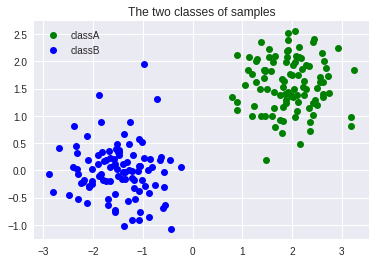

In [0]:
plt.plot(classA[0],classA[1],'go')
plt.plot(classB[0],classB[1],'bo')
plt.legend(['classA','classB'])
plt.title('The two classes of samples')
plt.show()

### Classification with a single-layer perceptron and analysis

#### Question 1

In [0]:
eta=0.00005

Implementation of the Delta rule

In [0]:
epochs=300

In [0]:
def delta_rule(X, T, W,eta,epochs):
  errors_list=[]
  for i in range(epochs):
    error=W.dot(X)-T
    correction = -eta*error.dot(X.T)
    W = W + correction
    errors_list.append(np.mean(np.square(error)))
  return W,errors_list

In [0]:
patterns=np.concatenate((classA,classB),axis=1)
patterns=np.concatenate((patterns,np.ones((1,2*n))))
targets=np.concatenate((np.ones(100),-np.ones(100)))
s = np.arange(patterns.shape[1])
np.random.shuffle(s)
patterns=patterns[:,s]
targets=targets[s]
weights=np.random.randn(1, p+1)

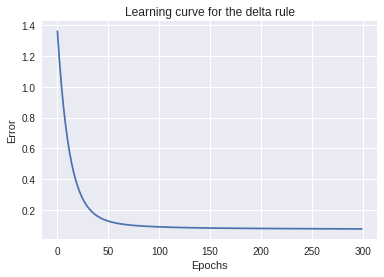

In [0]:
plt.plot(delta_rule(patterns,targets,weights,eta,epochs)[1])
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.title("Learning curve for the delta rule")
plt.show()

In [0]:
w1=delta_rule(patterns,targets,weights,eta,epochs)[0][0][0]
w2=delta_rule(patterns,targets,weights,eta,epochs)[0][0][1]
w3=delta_rule(patterns,targets,weights,eta,epochs)[0][0][2]

In [0]:
x=np.linspace(-3,3,1000)

In [0]:
y=(-1/w2)*(w1*x+w3)

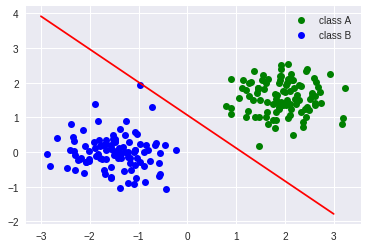

In [0]:
plt.plot(classA[0],classA[1],'go')
plt.plot(classB[0],classB[1],'bo')
plt.plot(x,y,'r-')
plt.legend(['class A','class B'])
plt.show()

Implementation of the perceptron learning

In [0]:
epochs=2000

In [0]:
def perceptron_learning(X, T, W,eta,epochs):
  errors_list=[]
  for i in range(epochs):
    Y=W.dot(X)
    for k in range(np.shape(Y)[1]):
      if Y[0][k]>=0 and T[k]<0:
        W=W-eta*X[:,k]
      if Y[0][k]<0 and T[k]>0:
        W=W+eta*X[:,k]
    error=T-Y
    errors_list.append(np.mean(np.square(error)))
  return W,errors_list

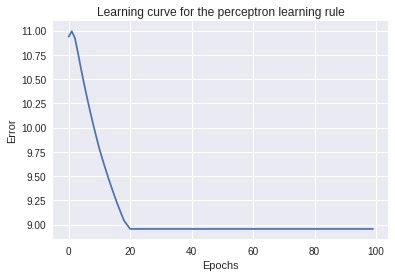

In [0]:
plt.plot(perceptron_learning(patterns,targets,weights,eta=0.01,epochs=100)[1])
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.title("Learning curve for the perceptron learning rule")
plt.show()

In [0]:
w1=perceptron_learning(patterns,targets,weights,eta,epochs)[0][0][0]
w2=perceptron_learning(patterns,targets,weights,eta,epochs)[0][0][1]
w3=perceptron_learning(patterns,targets,weights,eta,epochs)[0][0][2]

In [0]:
y=(-1/w2)*(w1*x+w3)

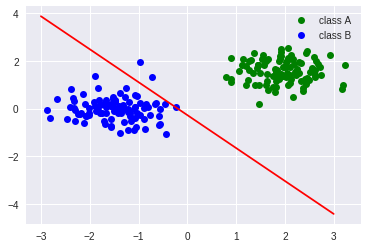

In [0]:
plt.plot(classA[0],classA[1],'go')
plt.plot(classB[0],classB[1],'bo')
plt.plot(x,y,'r-')
plt.legend(['class A','class B'])
plt.show()

Eta=0.01 seems to be an appropriate value. A greater value makes the error diverge and a really small value slows the convergence of the algorithm.

The Delta Rule is better because the decision boundary of the perceptron learning is really close the limit points. Plus, the Delta rule converges faster.

#### Question 2

In [0]:
epochs=500
eta=0.00005

In [0]:
def sequential_delta_rule(X, T, W,eta,epochs):
  errors_list=[]
  for i in range(epochs):
    for k in range(np.shape(T)[0]):
      tmp=[]
      error=W.dot(X[:,k])-T[k]
      tmp.append(error**2)
      W=W-eta*error*X[:,k].T
    errors_list.append(np.mean(tmp))
  return W,errors_list

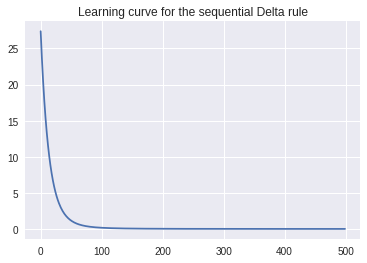

In [0]:
plt.plot(sequential_delta_rule(patterns,targets,weights,eta,epochs)[1])
plt.title('Learning curve for the sequential Delta rule')
plt.show()

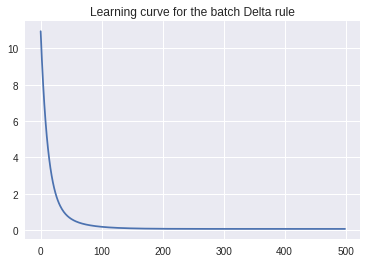

In [0]:
plt.plot(delta_rule(patterns,targets,weights,eta,epochs)[1])
plt.title('Learning curve for the batch Delta rule')
plt.show()

Depending on the initialisation, both version of the algorithms converge more or less quickly.

In [0]:
w1=sequential_delta_rule(patterns,targets,weights,eta,epochs)[0][0][0]
w2=sequential_delta_rule(patterns,targets,weights,eta,epochs)[0][0][1]
w3=sequential_delta_rule(patterns,targets,weights,eta,epochs)[0][0][2]

In [0]:
w4=delta_rule(patterns,targets,weights,eta,epochs)[0][0][0]
w5=delta_rule(patterns,targets,weights,eta,epochs)[0][0][1]
w6=delta_rule(patterns,targets,weights,eta,epochs)[0][0][2]

In [0]:
y=(-1/w2)*(w1*x+w3)

In [0]:
y2=(-1/w5)*(w4*x+w6)

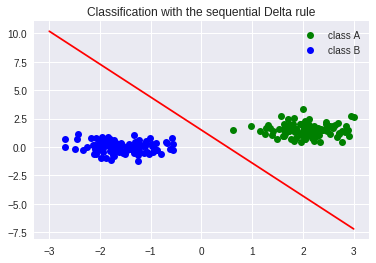

In [0]:
plt.plot(classA[0],classA[1],'go')
plt.plot(classB[0],classB[1],'bo')
plt.plot(x,y,'r-')
plt.legend(['class A','class B'])
plt.title('Classification with the sequential Delta rule')
plt.show()

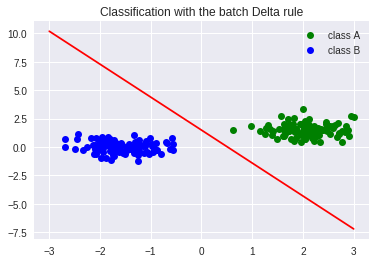

In [0]:
plt.plot(classA[0],classA[1],'go')
plt.plot(classB[0],classB[1],'bo')
plt.plot(x,y2,'r-')
plt.legend(['class A','class B'])
plt.title('Classification with the batch Delta rule')
plt.show()

Differents random initialisations may change the speed of convergence of the algorithms but the order seems to remain the same.

#### Question 3

In [0]:
mA = [2,1.5]
mB = [-1.5,0]

In [0]:
classA[0]= np.random.randn(1,100)*sigmaA +mA[0]
classB[0]= np.random.randn(1,n)*sigmaB +mB[0]
classA[1]= np.random.randn(1,100)*sigmaA +mA[1]
classB[1]= np.random.randn(1,n)*sigmaB +mB[1]

In [0]:
patterns=np.concatenate((classA,classB),axis=1)
weights=np.random.randn(1, p)
s = np.arange(patterns.shape[1])
np.random.shuffle(s)
patterns=patterns[:,s]
targets=targets[s]

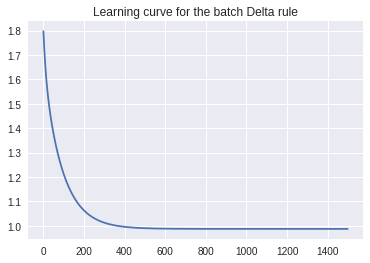

In [0]:
plt.plot(delta_rule(patterns,targets,weights,eta,epochs)[1])
plt.title('Learning curve for the batch Delta rule')
plt.show()

In [0]:
w1=delta_rule(patterns,targets,weights,eta,epochs)[0][0][0]
w2=delta_rule(patterns,targets,weights,eta,epochs)[0][0][1]

In [0]:
y=x*(-w1/w2)

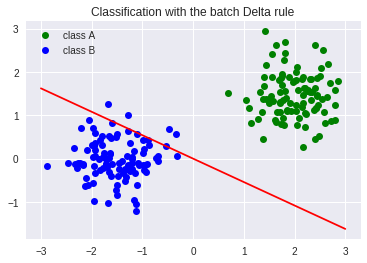

In [0]:
plt.plot(classA[0],classA[1],'go')
plt.plot(classB[0],classB[1],'bo')
plt.plot(x,y,'r-')
plt.legend(['class A','class B'])
plt.title('Classification with the batch Delta rule')
plt.show()

As the boundary goes through the origin, the perceptron will not be able to classify all the samples if one of the class has a mean which is almost the origin.
Let's set mA to [0,0] to illustrate this statement.

In [0]:
mA = [0,0]
mB = [-2.5,0]

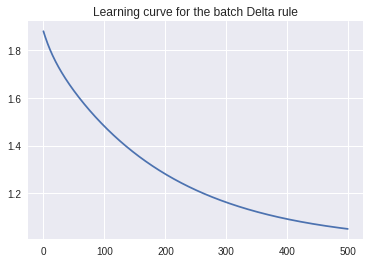

In [0]:
classA[0]= np.random.randn(1,100)*sigmaA +mA[0]
classB[0]= np.random.randn(1,n)*sigmaB +mB[0]
classA[1]= np.random.randn(1,100)*sigmaA +mA[1]
classB[1]= np.random.randn(1,n)*sigmaB +mB[1]
patterns=np.concatenate((classA,classB),axis=1)
weights=np.random.randn(1, p)
s = np.arange(patterns.shape[1])
np.random.shuffle(s)
patterns=patterns[:,s]
targets=targets[s]
plt.plot(delta_rule(patterns,targets,weights,eta,epochs)[1])
plt.title('Learning curve for the batch Delta rule')
plt.show()

In [0]:
w1=delta_rule(patterns,targets,weights,eta,epochs)[0][0][0]
w2=delta_rule(patterns,targets,weights,eta,epochs)[0][0][1]

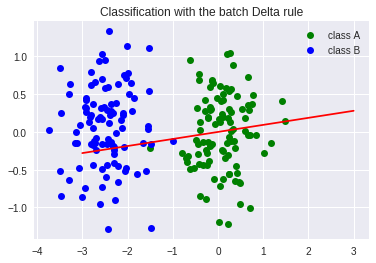

In [0]:
y=x*(-w1/w2)
plt.plot(classA[0],classA[1],'go')
plt.plot(classB[0],classB[1],'bo')
plt.plot(x,y,'r-')
plt.legend(['class A','class B'])
plt.title('Classification with the batch Delta rule')
plt.show()

We can see that even after 1000 epochs, the error has not converged to 0 and the perceptron is not able to classify correctly the sample from class A.

### Classification of samples that are not linearly separable

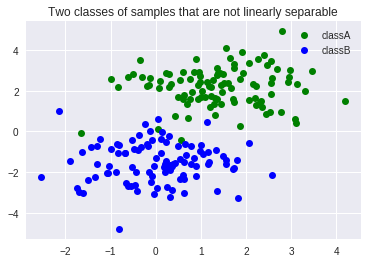

In [0]:
mA = [2,1.5]
mB = [-1.5,0]
sigmaA=1
sigmaB=1

classA[0]= np.random.randn(1,100)*sigmaA +mA[0]
classB[0]= np.random.randn(1,n)*sigmaB +mB[0]
classA[1]= np.random.randn(1,100)*sigmaA +mA[1]
classB[1]= np.random.randn(1,n)*sigmaB +mB[1]

np.random.shuffle(classA)
np.random.shuffle(classB)

plt.plot(classA[0],classA[1],'go')
plt.plot(classB[0],classB[1],'bo')
plt.legend(['classA','classB'])
plt.title('Two classes of samples that are not linearly separable')
plt.show()

In [0]:
patterns=np.concatenate((classA,classB),axis=1)
patterns=np.concatenate((patterns,np.ones((1,2*n))))
targets=np.concatenate((np.ones(100),-np.ones(100)))
s = np.arange(patterns.shape[1])
np.random.shuffle(s)
patterns=patterns[:,s]
targets=targets[s]
weights=np.random.randn(1, p+1)

Perceptron learning

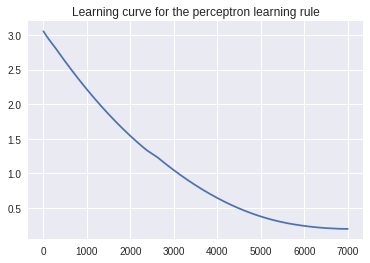

In [0]:
plt.plot(perceptron_learning(patterns,targets,weights,eta,epochs=7000)[1])
plt.title('Learning curve for the perceptron learning rule')
plt.show()

In [0]:
w1=perceptron_learning(patterns,targets,weights,eta,epochs)[0][0][0]
w2=perceptron_learning(patterns,targets,weights,eta,epochs)[0][0][1]
w3=perceptron_learning(patterns,targets,weights,eta,epochs)[0][0][2]

In [0]:
y=(-1/w2)*(w1*x+w3)

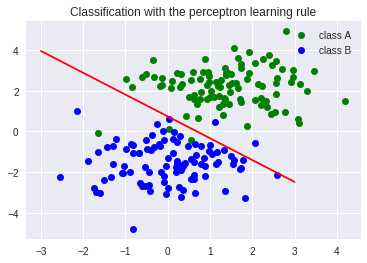

In [0]:
plt.plot(classA[0],classA[1],'go')
plt.plot(classB[0],classB[1],'bo')
plt.plot(x,y,'r-')
plt.legend(['class A','class B'])
plt.title('Classification with the perceptron learning rule')
plt.show()

Sequential Delta rule

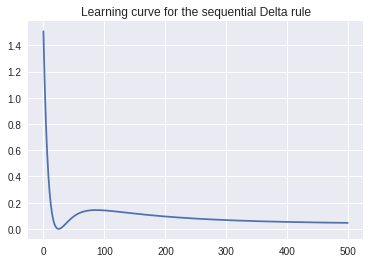

In [0]:
plt.plot(sequential_delta_rule(patterns,targets,weights,eta,epochs)[1])
plt.title('Learning curve for the sequential Delta rule')
plt.show()

In [0]:
w1=sequential_delta_rule(patterns,targets,weights,eta,epochs)[0][0][0]
w2=sequential_delta_rule(patterns,targets,weights,eta,epochs)[0][0][1]
w3=sequential_delta_rule(patterns,targets,weights,eta,epochs)[0][0][2]

In [0]:
y=(-1/w2)*(w1*x+w3)

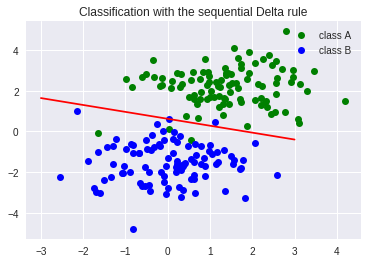

In [0]:
plt.plot(classA[0],classA[1],'go')
plt.plot(classB[0],classB[1],'bo')
plt.plot(x,y,'r-')
plt.legend(['class A','class B'])
plt.title('Classification with the sequential Delta rule')
plt.show()

Batch Delta rule

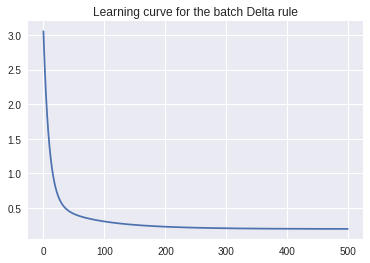

In [0]:
plt.plot(delta_rule(patterns,targets,weights,eta,epochs)[1])
plt.title('Learning curve for the batch Delta rule')
plt.show()

In [0]:
w1=delta_rule(patterns,targets,weights,eta,epochs)[0][0][0]
w2=delta_rule(patterns,targets,weights,eta,epochs)[0][0][1]
w3=delta_rule(patterns,targets,weights,eta,epochs)[0][0][2]

In [0]:
y=(-1/w2)*(w1*x+w3)

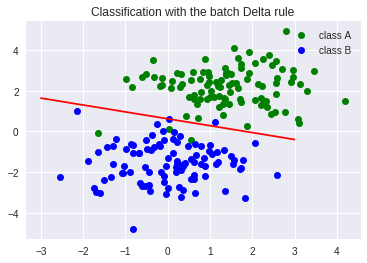

In [0]:
plt.plot(classA[0],classA[1],'go')
plt.plot(classB[0],classB[1],'bo')
plt.plot(x,y,'r-')
plt.legend(['class A','class B'])
plt.title('Classification with the batch Delta rule')
plt.show()

We can notice than the perceptron learning rule is much slower than the Delta rule but however the three methods converge to 0, only the sequential Delta rule has a limit which is not exactly 0. 

#### Second part

In [0]:
ndata=100
epochs=2500

In [0]:
classA=np.zeros((p,ndata))
classB=np.zeros((p,ndata))

In [0]:
mA= [1, 0.3]
mB= [0, -0.1]
sigmaA=0.2
sigmaB=0.3
classA[0]= np.concatenate((np.random.randn(1,int(0.5*ndata))*sigmaA-mA[0],np.random.randn(1,int(0.5*ndata))*sigmaA+mA[0]),axis=1)
classB[0]= np.random.randn(1,ndata)*sigmaB +mB[0]
classA[1]= np.random.randn(1,ndata)*sigmaA +mA[1]
classB[1]= np.random.randn(1,ndata)*sigmaB +mB[1]
classA=classA.T
classB=classB.T
np.random.shuffle(classA)
np.random.shuffle(classB)
classA=classA.T
classB=classB.T

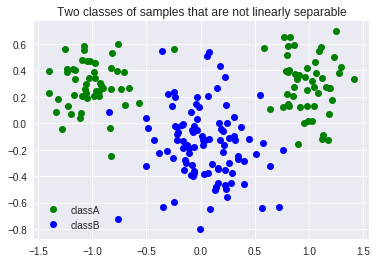

In [0]:
plt.plot(classA[0],classA[1],'go')
plt.plot(classB[0],classB[1],'bo')
plt.legend(['classA','classB'])
plt.title('Two classes of samples that are not linearly separable')
plt.show()

Whole dataset

In [0]:
patterns=np.concatenate((classA,classB),axis=1)
patterns=np.concatenate((patterns,np.ones((1,np.shape(patterns)[1]))))
targets=np.concatenate((np.ones(int(0.5*np.shape(patterns)[1])),-np.ones(int(0.5*np.shape(patterns)[1]))))
s = np.arange(patterns.shape[1])
np.random.shuffle(s)
patterns=patterns[:,s]
targets=targets[s]
weights=np.random.randn(1, p+1)

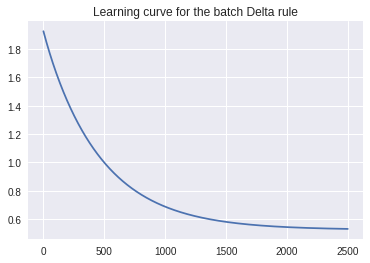

In [0]:
plt.plot(delta_rule(patterns,targets,weights,eta,epochs)[1])
plt.title('Learning curve for the batch Delta rule')
plt.show()

In [0]:
w1=delta_rule(patterns,targets,weights,eta,epochs)[0][0][0]
w2=delta_rule(patterns,targets,weights,eta,epochs)[0][0][1]
w3=delta_rule(patterns,targets,weights,eta,epochs)[0][0][2]

In [0]:
y=(-1/w2)*(w1*x+w3)

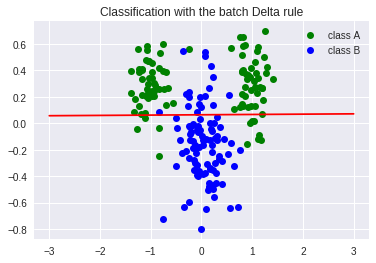

In [0]:
plt.plot(classA[0],classA[1],'go')
plt.plot(classB[0],classB[1],'bo')
plt.plot(x,y,'r-')
plt.legend(['class A','class B'])
plt.title('Classification with the batch Delta rule')
plt.show()

First scenario: random 25% from each class

In [0]:
classA_prime=classA[:,:int(0.75*ndata)]
classB_prime=classB[:,:int(0.75*ndata)]

In [0]:
patterns=np.concatenate((classA_prime,classB_prime),axis=1)
patterns=np.concatenate((patterns,np.ones((1,np.shape(patterns)[1]))))
targets=np.concatenate((np.ones(int(0.5*np.shape(patterns)[1])),-np.ones(int(0.5*np.shape(patterns)[1]))))
s = np.arange(patterns.shape[1])
np.random.shuffle(s)
patterns=patterns[:,s]
targets=targets[s]
weights=np.random.randn(1, p+1)

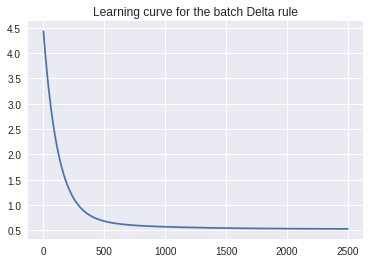

In [0]:
plt.plot(delta_rule(patterns,targets,weights,eta,epochs)[1])
plt.title('Learning curve for the batch Delta rule')
plt.show()

In [0]:
w1=delta_rule(patterns,targets,weights,eta,epochs)[0][0][0]
w2=delta_rule(patterns,targets,weights,eta,epochs)[0][0][1]
w3=delta_rule(patterns,targets,weights,eta,epochs)[0][0][2]

In [0]:
y=(-1/w2)*(w1*x+w3)

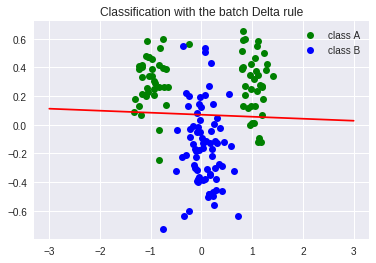

In [0]:
plt.plot(classA_prime[0],classA_prime[1],'go')
plt.plot(classB_prime[0],classB_prime[1],'bo')
plt.plot(x,y,'r-')
plt.legend(['class A','class B'])
plt.title('Classification with the batch Delta rule')
plt.show()

When we remove 25% of each class, the decision boundary remains the same and the algorithm converges in the same number of epochs.

Second scenario: 50% from classA

In [0]:
classA_prime=classA[:,:int(0.5*ndata)]
classB_prime=classB

In [0]:
patterns=np.concatenate((classA_prime,classB_prime),axis=1)
patterns=np.concatenate((patterns,np.ones((1,np.shape(patterns)[1]))))
targets=np.concatenate((np.ones(np.shape(classA_prime)[1]),-np.ones(np.shape(classB_prime)[1])))
s = np.arange(patterns.shape[1])
np.random.shuffle(s)
patterns=patterns[:,s]
targets=targets[s]
weights=np.random.randn(1, p+1)

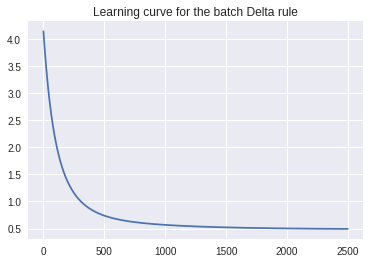

In [0]:
plt.plot(delta_rule(patterns,targets,weights,eta,epochs)[1])
plt.title('Learning curve for the batch Delta rule')
plt.show()

In [0]:
w1=delta_rule(patterns,targets,weights,eta,epochs)[0][0][0]
w2=delta_rule(patterns,targets,weights,eta,epochs)[0][0][1]
w3=delta_rule(patterns,targets,weights,eta,epochs)[0][0][2]

In [0]:
y=(-1/w2)*(w1*x+w3)

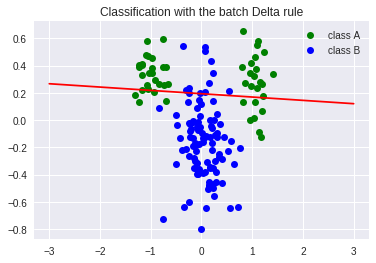

In [0]:
plt.plot(classA_prime[0],classA_prime[1],'go')
plt.plot(classB_prime[0],classB_prime[1],'bo')
plt.plot(x,y,'r-')
plt.legend(['class A','class B'])
plt.title('Classification with the batch Delta rule')
plt.show()

If we remove 50% of the samples of one class, the decision boundary has changed a little bit and the algorithm is a bit slower.

Third scenario: 50% from classB

In [0]:
classA_prime=classA
classB_prime=classB[:,:int(0.5*ndata)]

In [0]:
patterns=np.concatenate((classA_prime,classB_prime),axis=1)
patterns=np.concatenate((patterns,np.ones((1,np.shape(patterns)[1]))))
targets=np.concatenate((np.ones(np.shape(classA_prime)[1]),-np.ones(np.shape(classB_prime)[1])))
s = np.arange(patterns.shape[1])
np.random.shuffle(s)
patterns=patterns[:,s]
targets=targets[s]
weights=np.random.randn(1, p+1)

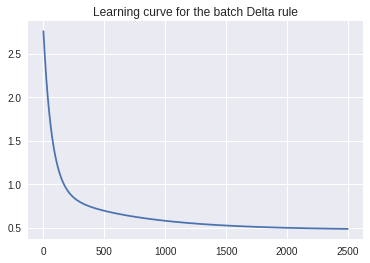

In [0]:
plt.plot(delta_rule(patterns,targets,weights,eta,epochs)[1])
plt.title('Learning curve for the batch Delta rule')
plt.show()

In [0]:
w1=delta_rule(patterns,targets,weights,eta,epochs)[0][0][0]
w2=delta_rule(patterns,targets,weights,eta,epochs)[0][0][1]
w3=delta_rule(patterns,targets,weights,eta,epochs)[0][0][2]

In [0]:
y=(-1/w2)*(w1*x+w3)

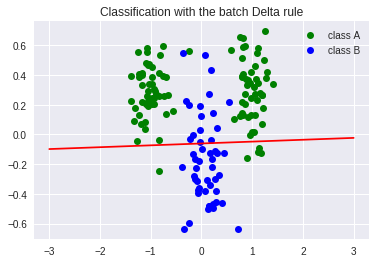

In [0]:
plt.plot(classA_prime[0],classA_prime[1],'go')
plt.plot(classB_prime[0],classB_prime[1],'bo')
plt.plot(x,y,'r-')
plt.legend(['class A','class B'])
plt.title('Classification with the batch Delta rule')
plt.show()

Now the decision boundary is the opposite from the previous scenario, but the algorithm still cannot classify correctly the samples.

Fourth scenario: 20% from a subset of classA for which classA(1,:)<0 and 80% from a subset of classA for which classA(1,:)>0

In [0]:
j=0
k=0
neg=np.zeros([2,ndata])
pos=np.zeros([2,ndata])
for i in range(np.shape(classA)[1]):
  if classA[0][i] <0:
    neg[:,j]=classA[:,i]
    j+=1
  else:
    pos[:,k]=classA[:,i]
    k+=1
pos=pos[:,:k]
neg=neg[:,:j]
pos=pos[:,:int(0.2*np.shape(pos[:,:50])[1])]
neg=neg[:,:int(0.8*np.shape(neg[:,:50])[1])]
classA_prime=np.concatenate((pos,neg),axis=1)
classB_prime=classB

In [0]:
patterns=np.concatenate((classA_prime,classB_prime),axis=1)
patterns=np.concatenate((patterns,np.ones((1,np.shape(patterns)[1]))))
targets=np.concatenate((np.ones(np.shape(classA_prime)[1]),-np.ones(np.shape(classB_prime)[1])))
s = np.arange(patterns.shape[1])
np.random.shuffle(s)
patterns=patterns[:,s]
targets=targets[s]
weights=np.random.randn(1, p+1)

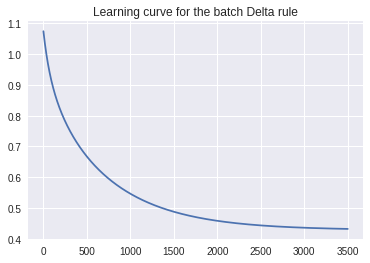

In [0]:
plt.plot(delta_rule(patterns,targets,weights,eta,epochs=3500)[1])
plt.title('Learning curve for the batch Delta rule')
plt.show()

In [0]:
w1=delta_rule(patterns,targets,weights,eta,epochs)[0][0][0]
w2=delta_rule(patterns,targets,weights,eta,epochs)[0][0][1]
w3=delta_rule(patterns,targets,weights,eta,epochs)[0][0][2]

In [0]:
y=(-1/w2)*(w1*x+w3)

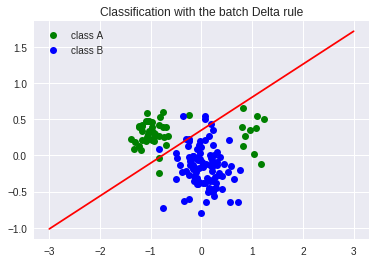

In [0]:
plt.plot(classA_prime[0],classA_prime[1],'go')
plt.plot(classB_prime[0],classB_prime[1],'bo')
plt.plot(x,y,'r-')
plt.legend(['class A','class B'])
plt.title('Classification with the batch Delta rule')
plt.show()

Now the decision boundary is totally different. Indeed we have almost removed all the samples from class A which had a positive abscissa  so the dataset is now almost linearly separable. 

To sum up, if the sampling of the whole dataset is biased, the generalisation will not be correct and predictions for sample that were not represented will be wrong.

## Classification and regression with a two-layer perceptron

### Classification of linearly non-separable data

In [0]:
epochs=15000
eta=0.0005
Nhidden=5

In [0]:
def phi(x):
  return 2/(1+np.exp(-x))-1

In [0]:
def phi_prime(x):
  return 0.5*((1+phi(x))*(1-phi(x)))

In [0]:
def forward(X,W,V):
  WX=W.dot(X)
  H=phi(WX)
  H=np.vstack([H,np.ones(np.shape(H)[1])])
  VH=V.dot(H)
  O=phi(VH)
  return O,H

In [0]:
def backward(T,O,H,V,Nhidden):
  delta_o = (O-T)* (phi_prime(O))
  delta_h=np.dot(V.T,delta_o)*(phi_prime(H))
  delta_h=delta_h[0:Nhidden]
  return delta_o,delta_h

In [0]:
def weightUpdate(delta_o,delta_h,X,H,W,V,eta,dw,dv,alpha):
  dw= alpha*dw-(1-alpha)*(delta_h.dot(X.T))
  W=W+eta*dw
  V=V+eta*dv
  return W,V,dw,dv

In [0]:
def backpropagation(X,T,W,V,eta,epochs,Nhidden,alpha=0.9):
  errors_list=[]
  misclassifications_list=[]
  dw=np.ones(np.shape(W))
  dv=np.ones(np.shape(V))
  all_weights1=[]
  all_weights2=[]
  for i in range(epochs):
    all_weights1.append(W)
    all_weights2.append(V)
    O,H=forward(X,W,V)
    
    number_misclassifications=np.shape(X)[1]-np.sum(np.round(O)==T)
    ratio=number_misclassifications/(np.shape(X)[1])
    misclassifications_list.append(ratio)
    errors_list.append(np.mean(np.square(O-T)))
    
    delta_o,delta_h=backward(T,O,H,V,Nhidden)
    
    W,V,dw,dv=weightUpdate(delta_o,delta_h,X,H,W,V,eta,dw,dv,alpha)
    
  all_weights1.append(W)
  all_weights2.append(V)
  return W,V,errors_list,misclassifications_list,all_weights1,all_weights2
 

In [0]:
def predict(patterns,W,V, classification = True):
        prediction, _ = forward(patterns,W,V)
        if classification:
            prediction[prediction > 0] = 1
            prediction[prediction <= 0] = -1
        return prediction

            
def plot_decision_boundary(patterns,T,points = True, h = 0.1):
        x_min, x_max = patterns[0, :].min() - 1, patterns[0, :].max() + 1
        y_min, y_max = patterns[1, :].min() - 1, patterns[1, :].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
        grid_data = np.transpose(np.c_[xx.ravel(), yy.ravel()])
        ones = np.transpose(np.ones((np.shape(xx)[1]*np.shape(xx)[0],1)))
        grid_data = np.vstack((grid_data,ones))
        Z = predict(grid_data,W,V)
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
        if points:
            plt.scatter(patterns[0, :], patterns[1, :],c= T, cmap=clr.ListedColormap(['red','green']))
        plt.show()

In [0]:
mA= [1, 0.3]
mB= [0, -0.1]
sigmaA=0.2
sigmaB=0.3
classA[0]= np.concatenate((np.random.randn(1,int(0.5*ndata))*sigmaA-mA[0],np.random.randn(1,int(0.5*ndata))*sigmaA+mA[0]),axis=1)
classB[0]= np.random.randn(1,ndata)*sigmaB +mB[0]
classA[1]= np.random.randn(1,ndata)*sigmaA +mA[1]
classB[1]= np.random.randn(1,ndata)*sigmaB +mB[1]
classA=classA.T
classB=classB.T
np.random.shuffle(classA)
np.random.shuffle(classB)
classA=classA.T
classB=classB.T

In [0]:
patterns=np.concatenate((classA,classB),axis=1)
patterns=np.concatenate((patterns,np.ones((1,np.shape(patterns)[1]))))
targets=np.concatenate((np.ones(np.shape(classA)[1]),-np.ones(np.shape(classB)[1])))
s = np.arange(patterns.shape[1])
np.random.shuffle(s)
patterns=patterns[:,s]
targets=targets[s]
weights1=np.random.randn(Nhidden,np.shape(patterns)[0])
weights2=np.random.randn(1,Nhidden+1)

In [0]:
W,V,errors_list,misclassifications_list,all_weights1,all_weights2=backpropagation(patterns,targets,weights1,weights2,eta,epochs,Nhidden,alpha=0.9)

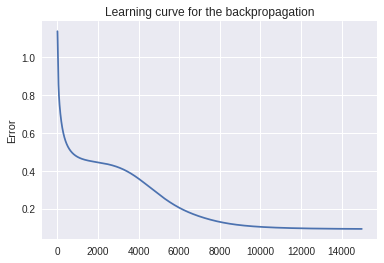

In [0]:
plt.plot(errors_list)
plt.title('Learning curve for the backpropagation')
plt.xlabel=("Epochs")
plt.ylabel("Error")
plt.show()

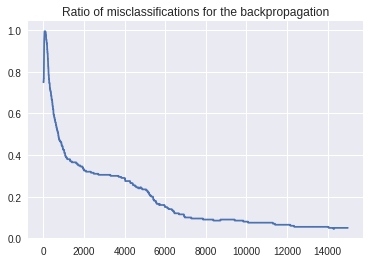

In [0]:
plt.plot(misclassifications_list)
plt.title('Ratio of misclassiﬁcations for the backpropagation')
plt.show()

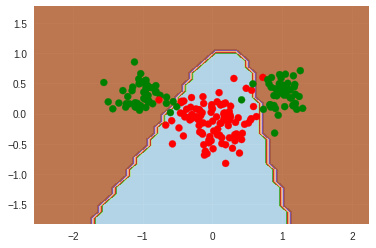

In [0]:
plot_decision_boundary(patterns,targets,points = True, h = 0.1)

#### Question 1

Influence of the number of hiddden nodes and the learning rate

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


Number of hidden nodes:  1 
Eta equals  0.01


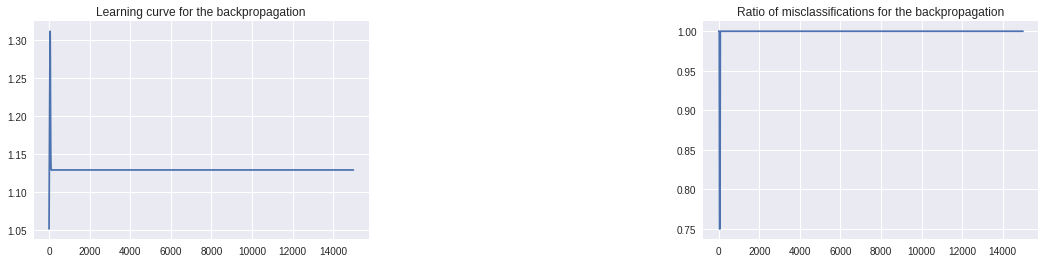

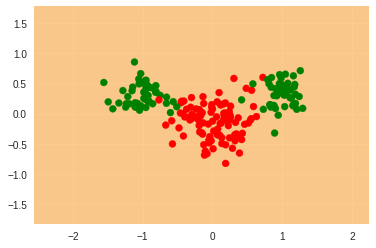

Number of hidden nodes:  1 
Eta equals  0.0005


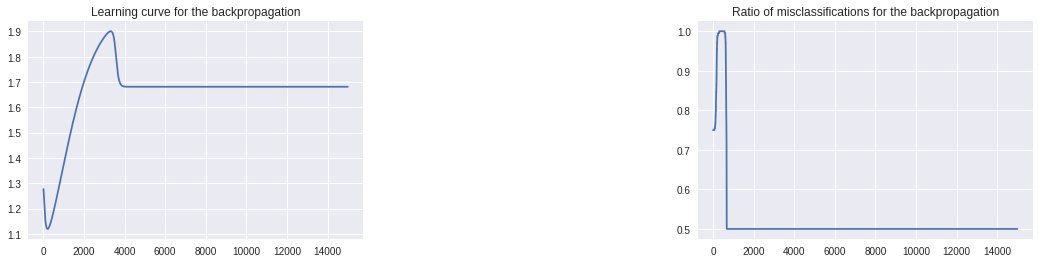

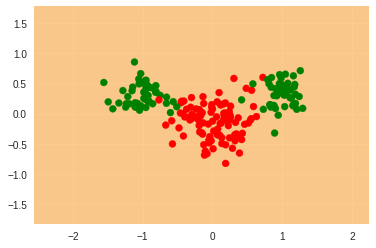

Number of hidden nodes:  1 
Eta equals  0.0001


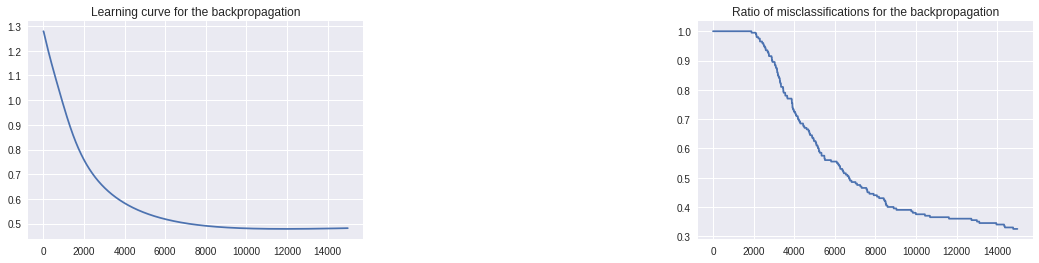

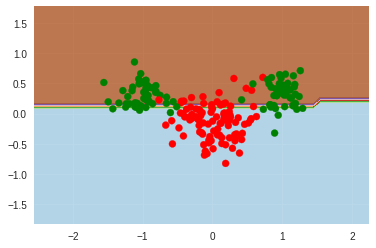

Number of hidden nodes:  4 
Eta equals  0.01


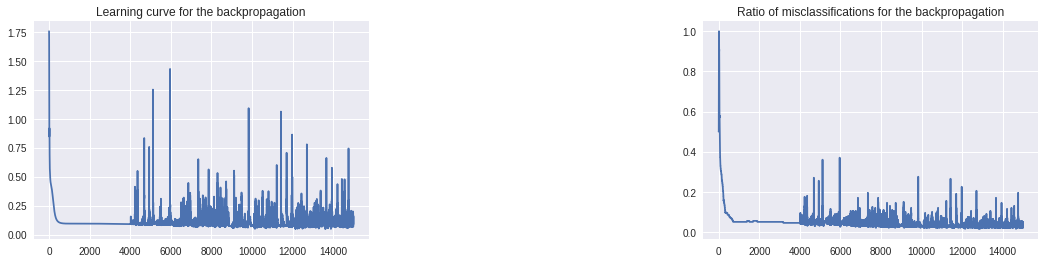

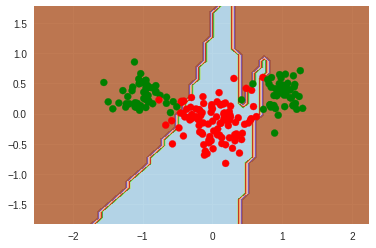

Number of hidden nodes:  4 
Eta equals  0.0005


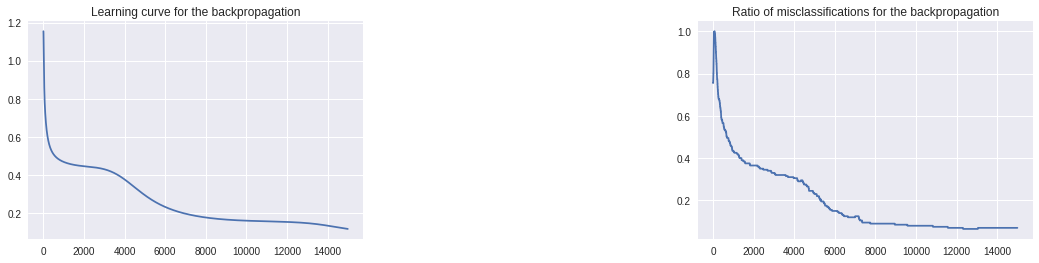

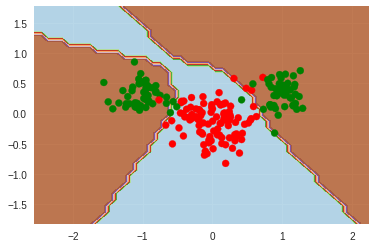

Number of hidden nodes:  4 
Eta equals  0.0001


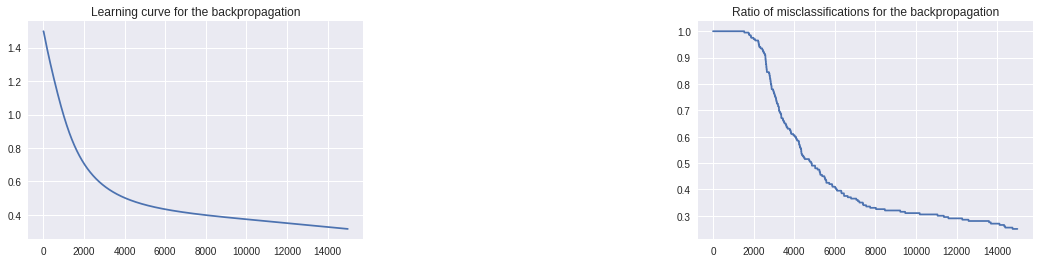

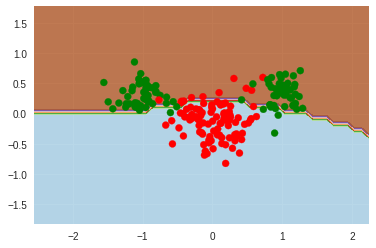

Number of hidden nodes:  10 
Eta equals  0.01


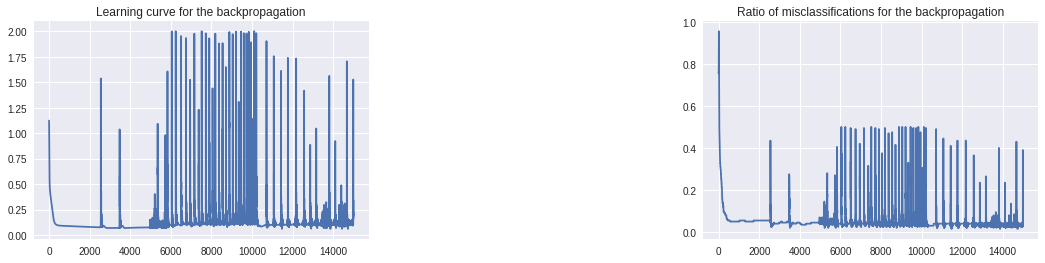

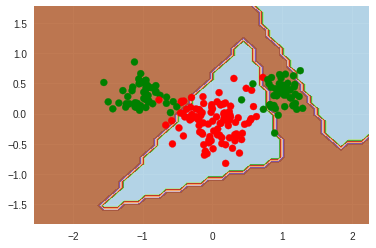

Number of hidden nodes:  10 
Eta equals  0.0005


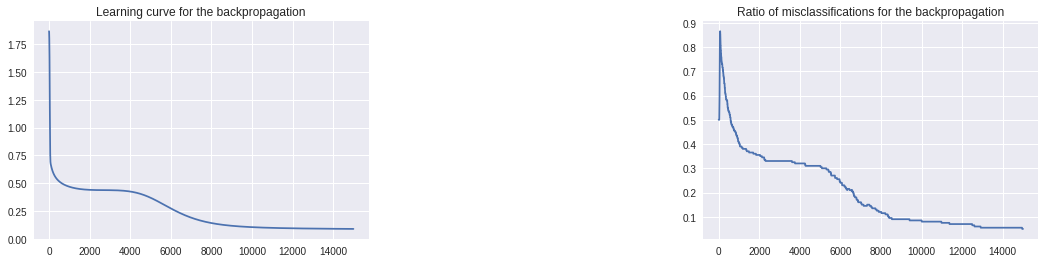

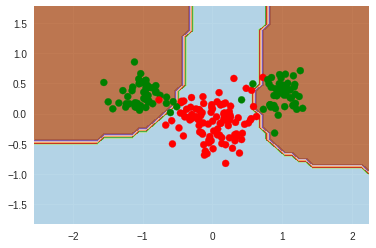

Number of hidden nodes:  10 
Eta equals  0.0001


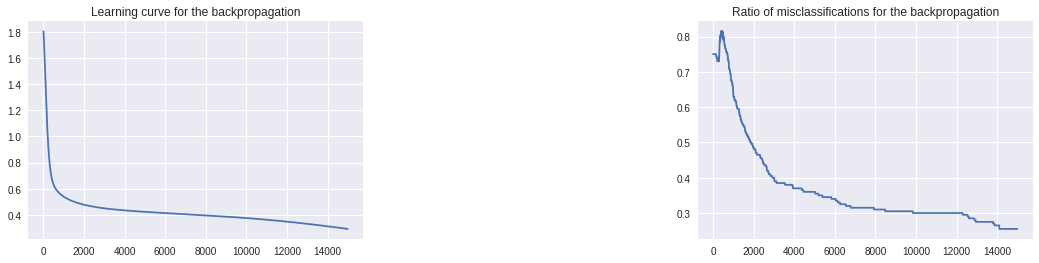

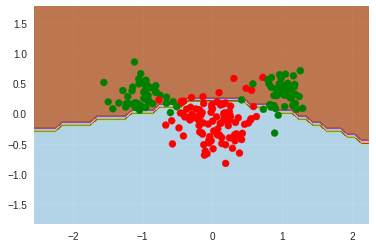

Number of hidden nodes:  30 
Eta equals  0.01


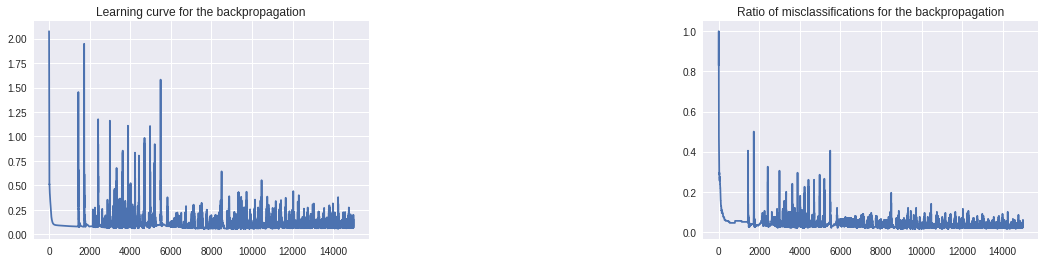

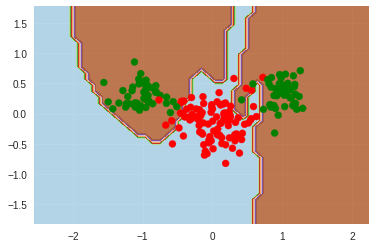

Number of hidden nodes:  30 
Eta equals  0.0005


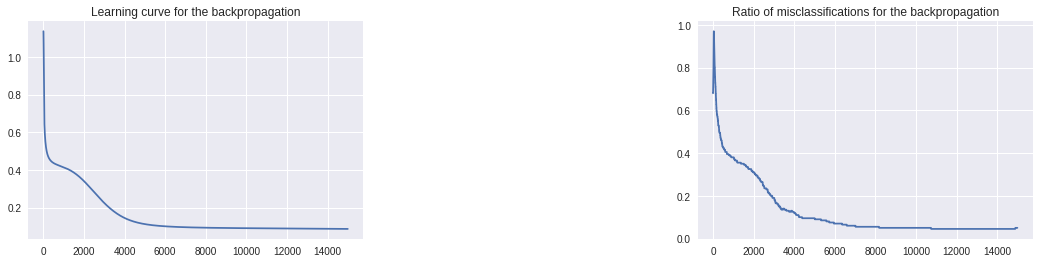

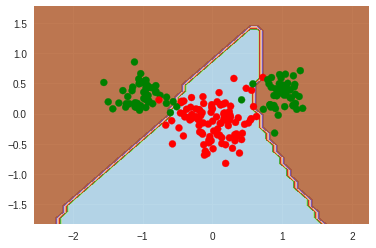

Number of hidden nodes:  30 
Eta equals  0.0001


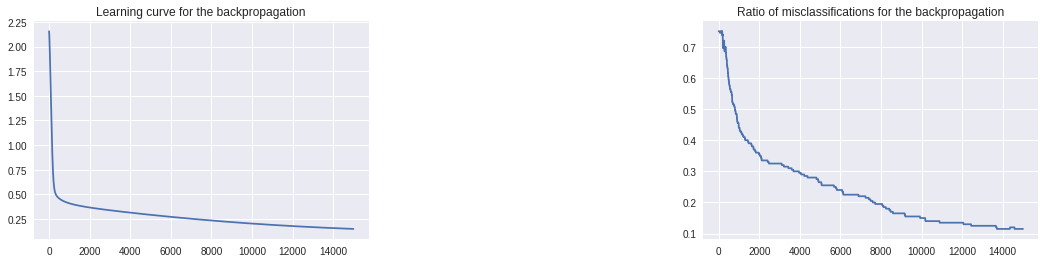

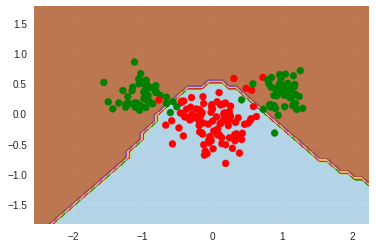

In [0]:
N_hidden_list=[1,4,10,30]
eta_list=[0.01,0.0005,0.0001]
for Nhidden in N_hidden_list:
  for eta in eta_list:
    weights1=np.random.randn(Nhidden,np.shape(patterns)[0])
    weights2=np.random.randn(1,Nhidden+1)
    W,V,errors_list,misclassifications_list,all_weights1,all_weights2=backpropagation(patterns,targets,weights1,weights2,eta,epochs,Nhidden,alpha=0.9)
    print("Number of hidden nodes: ",Nhidden,"\nEta equals ",eta)   

    fig, axes = plt.subplots(1, 2, figsize=(18, 4))

    axes[0].plot(errors_list)
    axes[0].set_title('Learning curve for the backpropagation')

    axes[1].plot(misclassifications_list)
    axes[1].axis('tight')
    axes[1].set_title('Ratio of misclassiﬁcations for the backpropagation')
    plt.subplots_adjust(wspace=1)
    plt.show()
    plot_decision_boundary(patterns,targets,points = True, h = 0.1)

It seems that a value of 0.0005 for eta is good. If it is smaller the algorithm will be too slow and a bigger value cannot guarantee the convergence.
However, the number of hidden nodes needs to be bigger.

Number of hidden nodes:  30 
Eta equals  0.0005


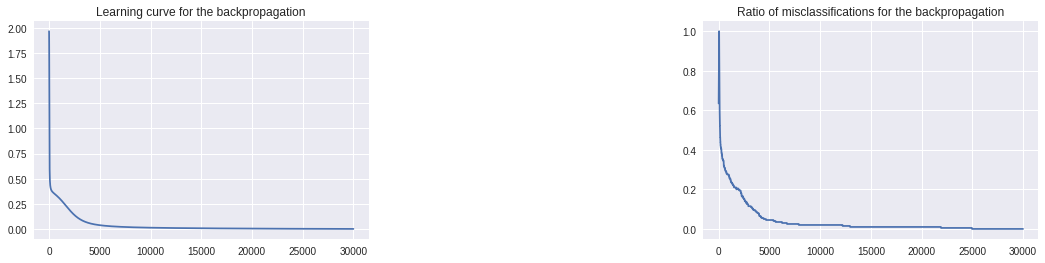

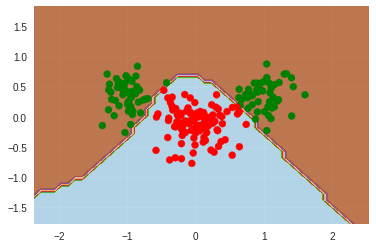

Number of hidden nodes:  40 
Eta equals  0.0005


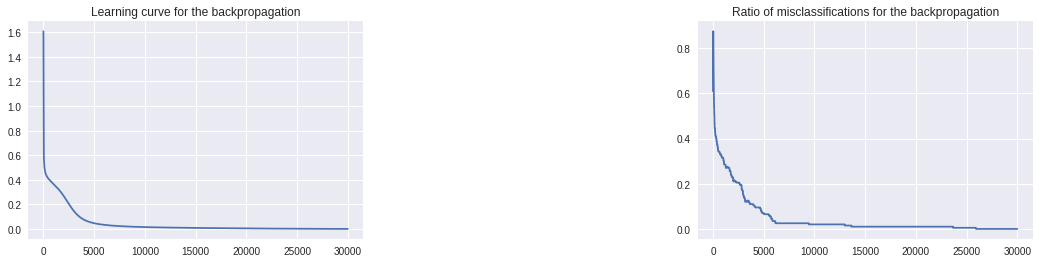

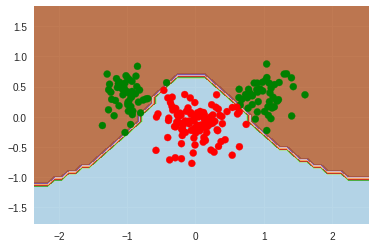

Number of hidden nodes:  50 
Eta equals  0.0005


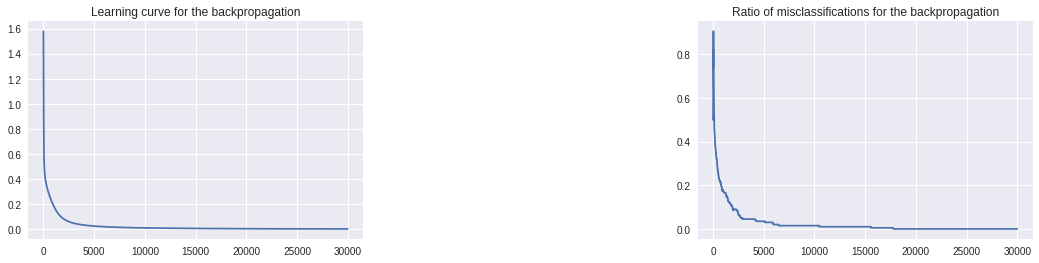

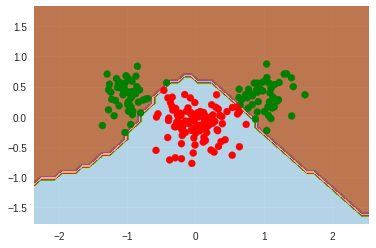

Number of hidden nodes:  100 
Eta equals  0.0005


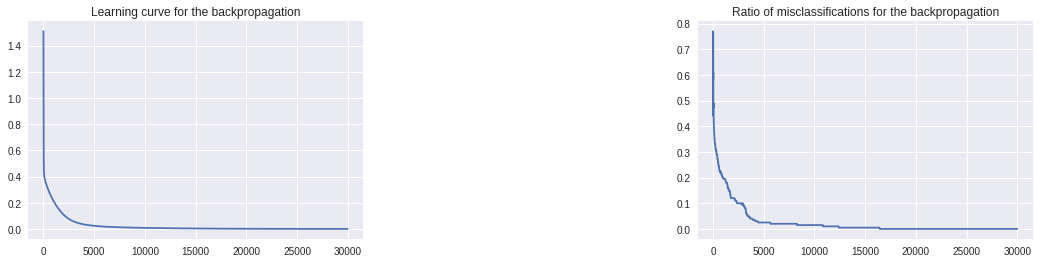

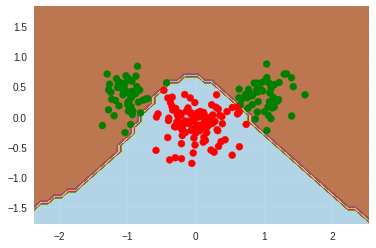

In [0]:
N_hidden_list=[30,40,50,100]
epochs=30000
eta=0.0005
for Nhidden in N_hidden_list:
  weights1=np.random.randn(Nhidden,np.shape(patterns)[0])
  weights2=np.random.randn(1,Nhidden+1)
  W,V,errors_list,misclassifications_list,all_weights1,all_weights2=backpropagation(patterns,targets,weights1,weights2,eta,epochs,Nhidden,alpha=0.9)
  print("Number of hidden nodes: ",Nhidden,"\nEta equals ",eta)   

  fig, axes = plt.subplots(1, 2, figsize=(18, 4))
  axes[0].plot(errors_list)
  axes[0].set_title('Learning curve for the backpropagation')

  axes[1].plot(misclassifications_list)
  axes[1].axis('tight')
  axes[1].set_title('Ratio of misclassiﬁcations for the backpropagation')
  plt.subplots_adjust(wspace=1)
  plt.show()
  plot_decision_boundary(patterns,targets,points = True, h = 0.1)

So the bigger the number of hidden nodes, the less inputs will be misclassified during the training. Maybe we need one hidden node per sample to perfectly separate the data.

#### Question 2

In [0]:
eta=0.0005
Nhidden=15
epochs=10000
patterns=np.concatenate((classA,classB),axis=1)
patterns=np.concatenate((patterns,np.ones((1,np.shape(patterns)[1]))))
targets=np.concatenate((np.ones(np.shape(classA)[1]),-np.ones(np.shape(classB)[1])))
s = np.arange(patterns.shape[1])
np.random.shuffle(s)
patterns=patterns[:,s]
targets=targets[s]

In [0]:
patterns_train1, patterns_test1, targets_train, targets_test = train_test_split(patterns.T, targets, test_size=0.2)

In [0]:
patterns_train=patterns_train1.T
patterns_test=patterns_test1.T

In [0]:
weights1=np.random.randn(Nhidden,np.shape(patterns_train)[0])
weights2=np.random.randn(1,Nhidden+1)

In [0]:
W,V,errors_list,misclassifications_list,all_weights1,all_weights2=backpropagation(patterns_train,targets_train,weights1,weights2,eta,epochs,Nhidden,alpha=0.9)

In [0]:
def test(X,T,epochs):
  errors_list_test=[]
  misclassifications_list_test=[]
  for i in range(epochs):
    O,H=forward(X,all_weights1[i],all_weights2[i])
    number_misclassifications=np.shape(X)[1]-np.sum(np.round(O)==T)
    ratio=number_misclassifications/(np.shape(X)[1])
    misclassifications_list_test.append(ratio)
    errors_list_test.append(np.mean(np.square(O-T)))
  return errors_list_test,misclassifications_list_test

In [0]:
errors_list_test,misclassifications_list_test=test(patterns_test,targets_test,epochs)

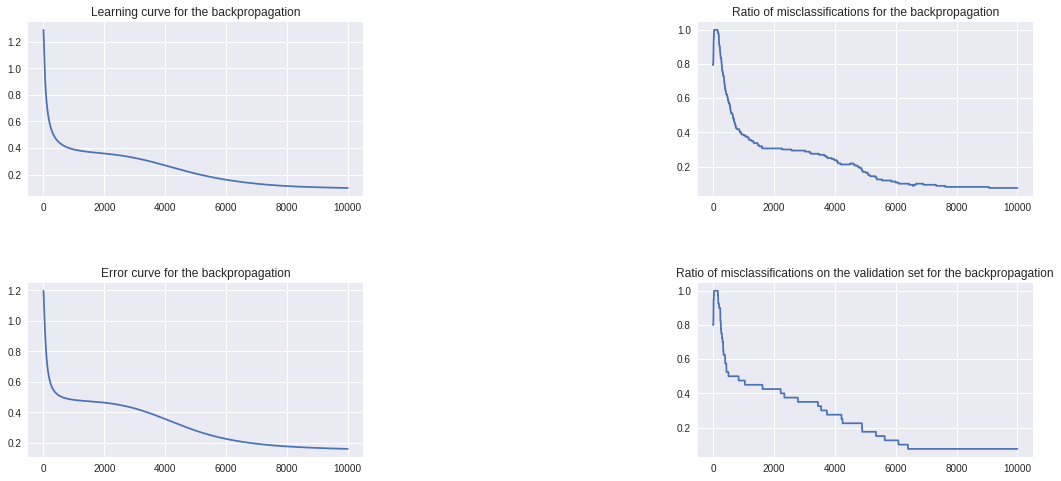

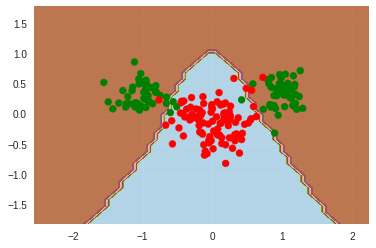

In [0]:
fig, axes = plt.subplots(2, 2, figsize=(18, 8))
axes[0][0].plot(errors_list)
axes[0][0].set_title('Learning curve for the backpropagation')

axes[0][1].plot(misclassifications_list)
axes[0][1].axis('tight')
axes[0][1].set_title('Ratio of misclassiﬁcations for the backpropagation')

axes[1][0].plot(errors_list_test)
axes[1][0].set_title('Error curve for the backpropagation')

axes[1][1].plot(misclassifications_list_test)
axes[1][1].axis('tight')
axes[1][1].set_title('Ratio of misclassiﬁcations on the validation set for the backpropagation')
plt.subplots_adjust(wspace=1)
plt.subplots_adjust(hspace=0.5)
plt.show()
plot_decision_boundary(patterns,targets,points = True, h = 0.1)

If we sample the data at random, we observe that the curves are pretty similar between train and validation. 
Let's now see what whappens with the scenario of section 3.1.3

In [0]:
mA= [1, 0.3]
mB= [0, -0.1]
sigmaA=0.2
sigmaB=0.3
classA[0]= np.concatenate((np.random.randn(1,int(0.5*ndata))*sigmaA-mA[0],np.random.randn(1,int(0.5*ndata))*sigmaA+mA[0]),axis=1)
classB[0]= np.random.randn(1,ndata)*sigmaB +mB[0]
classA[1]= np.random.randn(1,ndata)*sigmaA +mA[1]
classB[1]= np.random.randn(1,ndata)*sigmaB +mB[1]
classA=classA.T
classB=classB.T
np.random.shuffle(classA)
np.random.shuffle(classB)
classA=classA.T
classB=classB.T

First scenario

In [0]:
classA_train=classA[:,:int(0.75*ndata)]
classB_train=classB[:,:int(0.75*ndata)]
classA_test=classA[:,int(0.75*ndata):]
classB_test=classB[:,:int(0.75*ndata):]

In [0]:
patterns_train=np.concatenate((classA_train,classB_test),axis=1)
patterns_train=np.concatenate((patterns_train,np.ones((1,np.shape(patterns_train)[1]))))
targets_train=np.concatenate((np.ones(int(np.shape(classA_train)[1])),-np.ones(int(np.shape(classB_train)[1]))))
s = np.arange(patterns_train.shape[1])
np.random.shuffle(s)
patterns_train=patterns_train[:,s]
targets_train=targets_train[s]

patterns_test=np.concatenate((classA_test,classB_test),axis=1)
patterns_test=np.concatenate((patterns_test,np.ones((1,np.shape(patterns_test)[1]))))
targets_test=np.concatenate((np.ones(int(np.shape(classA_test)[1])),-np.ones(int(np.shape(classB_test)[1]))))
s = np.arange(patterns_test.shape[1])
np.random.shuffle(s)
patterns_test=patterns_test[:,s]
targets_test=targets_test[s]

In [0]:
weights1=np.random.randn(Nhidden,np.shape(patterns_train)[0])
weights2=np.random.randn(1,Nhidden+1)

In [0]:
W,V,errors_list,misclassifications_list,all_weights1,all_weights2=backpropagation(patterns_train,targets_train,weights1,weights2,eta,epochs,Nhidden,alpha=0.9)

In [0]:
errors_list_test,misclassifications_list_test=test(patterns_test,targets_test,epochs)

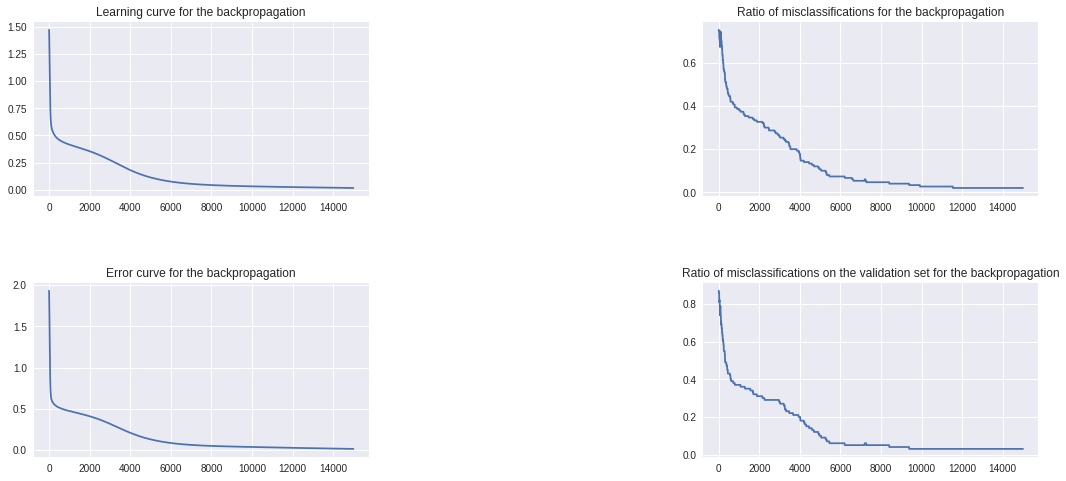

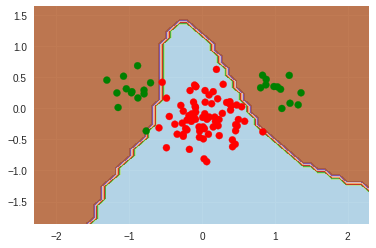

In [0]:
fig, axes = plt.subplots(2, 2, figsize=(18, 8))
axes[0][0].plot(errors_list)
axes[0][0].set_title('Learning curve for the backpropagation')

axes[0][1].plot(misclassifications_list)
axes[0][1].axis('tight')
axes[0][1].set_title('Ratio of misclassiﬁcations for the backpropagation')

axes[1][0].plot(errors_list_test)
axes[1][0].set_title('Error curve for the backpropagation')

axes[1][1].plot(misclassifications_list_test)
axes[1][1].axis('tight')
axes[1][1].set_title('Ratio of misclassiﬁcations on the validation set for the backpropagation')
plt.subplots_adjust(wspace=1)
plt.subplots_adjust(hspace=0.5)
plt.show()
plot_decision_boundary(patterns_test,targets_test,points = True, h = 0.1)

In [0]:
misclassifications_list_test[-1]

0.03

Second scenario

In [0]:
classA_train=classA[:,:int(0.5*ndata)]
classB_train=classB
classA_test=classA[:,int(0.5*ndata):]

In [0]:
patterns_train=np.concatenate((classA_train,classB_train),axis=1)
patterns_train=np.concatenate((patterns_train,np.ones((1,np.shape(patterns_train)[1]))))
targets_train=np.concatenate((np.ones(np.shape(classA_train)[1]),-np.ones(np.shape(classB_train)[1])))
s = np.arange(patterns_train.shape[1])
np.random.shuffle(s)
patterns_train=patterns_train[:,s]
targets_train=targets_train[s]

patterns_test=np.concatenate((classA_test,np.ones((1,np.shape(classA_test)[1]))))
targets_test=np.ones((np.shape(classA_test)[1]))
s = np.arange(patterns_test.shape[1])
np.random.shuffle(s)
patterns_test=patterns_test[:,s]
targets_test=targets_test[s]

In [0]:
weights1=np.random.randn(Nhidden,np.shape(patterns_train)[0])
weights2=np.random.randn(1,Nhidden+1)

In [0]:
W,V,errors_list,misclassifications_list,all_weights1,all_weights2=backpropagation(patterns_train,targets_train,weights1,weights2,eta,epochs,Nhidden,alpha=0.9)

In [0]:
errors_list_test,misclassifications_list_test=test(patterns_test,targets_test,epochs)

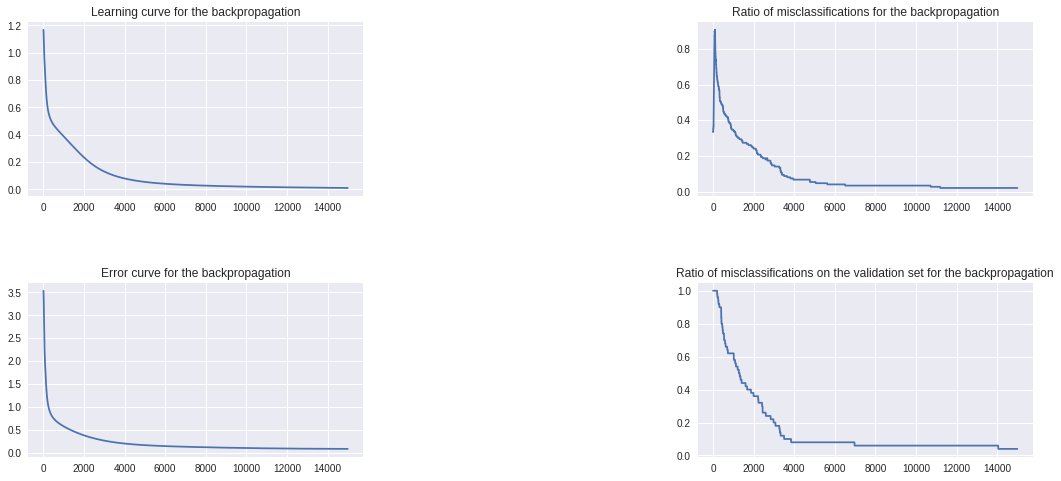

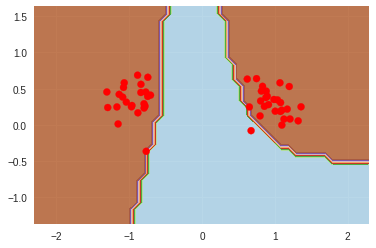

In [0]:
fig, axes = plt.subplots(2, 2, figsize=(18, 8))
axes[0][0].plot(errors_list)
axes[0][0].set_title('Learning curve for the backpropagation')

axes[0][1].plot(misclassifications_list)
axes[0][1].axis('tight')
axes[0][1].set_title('Ratio of misclassiﬁcations for the backpropagation')

axes[1][0].plot(errors_list_test)
axes[1][0].set_title('Error curve for the backpropagation')

axes[1][1].plot(misclassifications_list_test)
axes[1][1].axis('tight')
axes[1][1].set_title('Ratio of misclassiﬁcations on the validation set for the backpropagation')
plt.subplots_adjust(wspace=1)
plt.subplots_adjust(hspace=0.5)
plt.show()
plot_decision_boundary(patterns_test,targets_test,points = True, h = 0.1)

In [0]:
misclassifications_list_test[-1]

0.04

Third scenario

In [0]:
classB_train=classB[:,:int(0.5*ndata)]
classA_train=classA
classB_test=classB[:,int(0.5*ndata):]

In [0]:
patterns_train=np.concatenate((classA_train,classB_train),axis=1)
patterns_train=np.concatenate((patterns_train,np.ones((1,np.shape(patterns_train)[1]))))
targets_train=np.concatenate((np.ones(np.shape(classA_train)[1]),-np.ones(np.shape(classB_train)[1])))
s = np.arange(patterns_train.shape[1])
np.random.shuffle(s)
patterns_train=patterns_train[:,s]
targets_train=targets_train[s]

patterns_test=np.concatenate((classB_test,np.ones((1,np.shape(classB_test)[1]))))
targets_test=-np.ones((np.shape(classB_test)[1]))
s = np.arange(patterns_test.shape[1])
np.random.shuffle(s)
patterns_test=patterns_test[:,s]
targets_test=targets_test[s]

In [0]:
weights1=np.random.randn(Nhidden,np.shape(patterns_train)[0])
weights2=np.random.randn(1,Nhidden+1)

In [0]:
W,V,errors_list,misclassifications_list,all_weights1,all_weights2=backpropagation(patterns_train,targets_train,weights1,weights2,eta,epochs,Nhidden,alpha=0.9)

In [0]:
errors_list_test,misclassifications_list_test=test(patterns_test,targets_test,epochs)

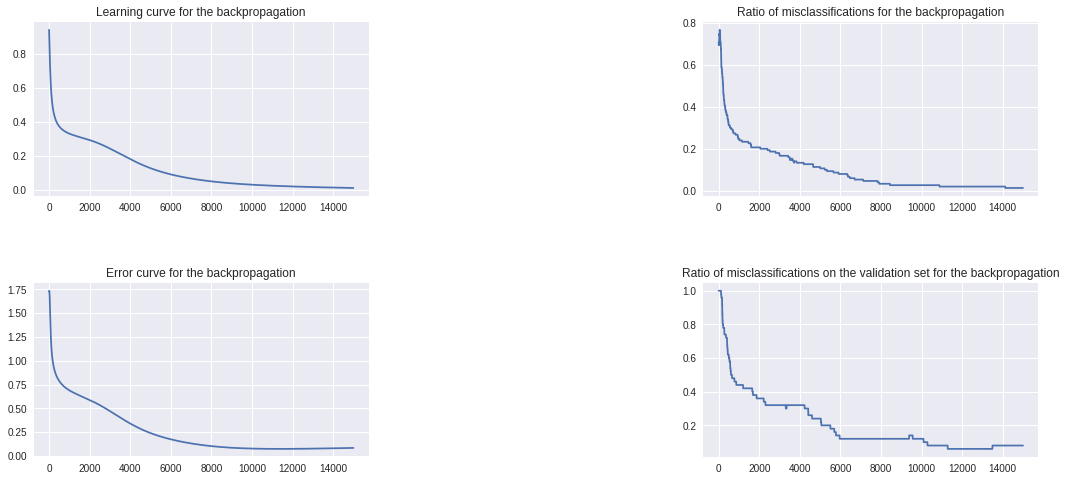

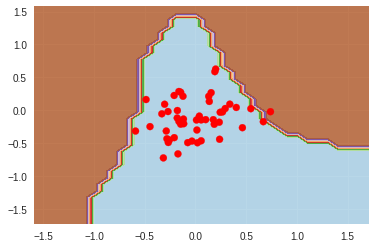

In [0]:
fig, axes = plt.subplots(2, 2, figsize=(18, 8))
axes[0][0].plot(errors_list)
axes[0][0].set_title('Learning curve for the backpropagation')

axes[0][1].plot(misclassifications_list)
axes[0][1].axis('tight')
axes[0][1].set_title('Ratio of misclassiﬁcations for the backpropagation')

axes[1][0].plot(errors_list_test)
axes[1][0].set_title('Error curve for the backpropagation')

axes[1][1].plot(misclassifications_list_test)
axes[1][1].axis('tight')
axes[1][1].set_title('Ratio of misclassiﬁcations on the validation set for the backpropagation')
plt.subplots_adjust(wspace=1)
plt.subplots_adjust(hspace=0.5)
plt.show()
plot_decision_boundary(patterns_test,targets_test,points = True, h = 0.1)

In [0]:
misclassifications_list_test[-1]

0.08

A commenter aussi

Fourth scenario

In [0]:
epochs=15000

In [0]:
j=0
k=0
neg=np.zeros([2,ndata])
pos=np.zeros([2,ndata])
for i in range(np.shape(classA)[1]):
  if classA[0][i] <0:
    neg[:,j]=classA[:,i]
    j+=1
  else:
    pos[:,k]=classA[:,i]
    k+=1
pos=pos[:,:k]
neg=neg[:,:j]
pos_train=pos[:,:int(0.2*np.shape(pos[:,:50])[1])]
neg_train=neg[:,:int(0.8*np.shape(neg[:,:50])[1])]
classA_train=np.concatenate((pos_train,neg_train),axis=1)
classB_train=classB

pos_test=pos[:,int(0.2*np.shape(pos[:,:50])[1]):]
neg_test=neg[:,int(0.8*np.shape(neg[:,:50])[1]):]
classA_test=np.concatenate((pos_test,neg_test),axis=1)

In [0]:
patterns_train=np.concatenate((classA_train,classB_train),axis=1)
patterns_train=np.concatenate((patterns_train,np.ones((1,np.shape(patterns_train)[1]))))
targets_train=np.concatenate((np.ones(np.shape(classA_train)[1]),-np.ones(np.shape(classB_train)[1])))
s = np.arange(patterns_train.shape[1])
np.random.shuffle(s)
patterns_train=patterns_train[:,s]
targets_train=targets_train[s]

patterns_test=np.concatenate((classA_test,np.ones((1,np.shape(classA_test)[1]))))
targets_test=np.ones((np.shape(classA_test)[1]))
s = np.arange(patterns_test.shape[1])
np.random.shuffle(s)
patterns_test=patterns_test[:,s]
targets_test=targets_test[s]

In [0]:
weights1=np.random.randn(Nhidden,np.shape(patterns_train)[0])
weights2=np.random.randn(1,Nhidden+1)

In [0]:
W,V,errors_list,misclassifications_list,all_weights1,all_weights2=backpropagation(patterns_train,targets_train,weights1,weights2,eta,epochs,Nhidden,alpha=0.9)

In [0]:
errors_list_test,misclassifications_list_test=test(patterns_test,targets_test,epochs)

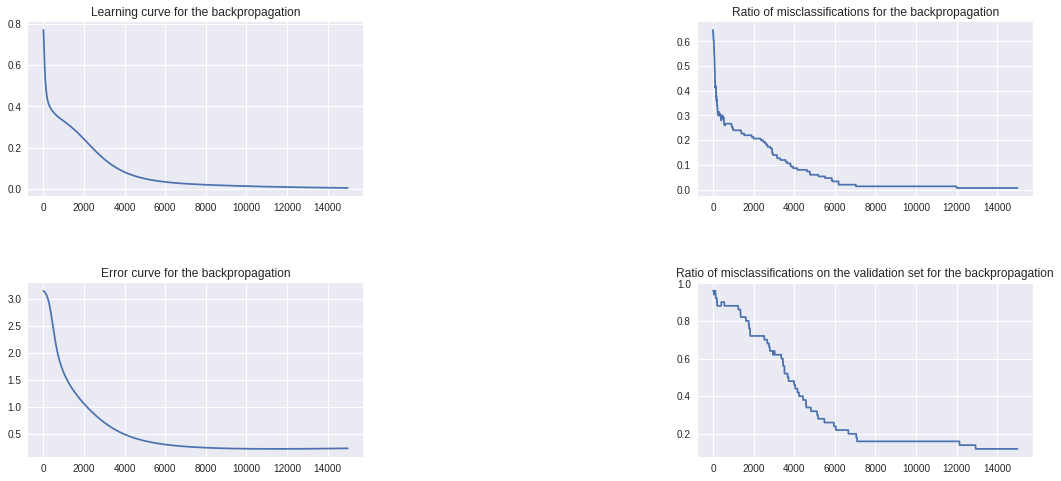

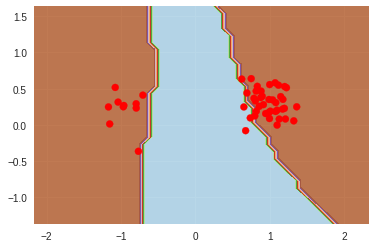

In [0]:
fig, axes = plt.subplots(2, 2, figsize=(18, 8))
axes[0][0].plot(errors_list)
axes[0][0].set_title('Learning curve for the backpropagation')

axes[0][1].plot(misclassifications_list)
axes[0][1].axis('tight')
axes[0][1].set_title('Ratio of misclassiﬁcations for the backpropagation')

axes[1][0].plot(errors_list_test)
axes[1][0].set_title('Error curve for the backpropagation')

axes[1][1].plot(misclassifications_list_test)
axes[1][1].axis('tight')
axes[1][1].set_title('Ratio of misclassiﬁcations on the validation set for the backpropagation')
plt.subplots_adjust(wspace=1)
plt.subplots_adjust(hspace=0.5)
plt.show()
plot_decision_boundary(patterns_test,targets_test,points = True, h = 0.1)

In [0]:
misclassifications_list_test[-1]

0.12

So now we see that even if the learning curve is converging to 0. The error curve on the test set is increasing and not converging to 0. We cannot classify all the test samples.

Let's now see the influence of the number of hidden nodes

In [0]:
patterns=np.concatenate((classA,classB),axis=1)
patterns=np.concatenate((patterns,np.ones((1,np.shape(patterns)[1]))))
targets=np.concatenate((np.ones(np.shape(classA)[1]),-np.ones(np.shape(classB)[1])))
s = np.arange(patterns.shape[1])
np.random.shuffle(s)
patterns=patterns[:,s]
targets=targets[s]

In [0]:
patterns_train1, patterns_test1, targets_train, targets_test = train_test_split(patterns.T, targets, test_size=0.2)

In [0]:
patterns_train=patterns_train1.T
patterns_test=patterns_test1.T

Number of hidden nodes:  5


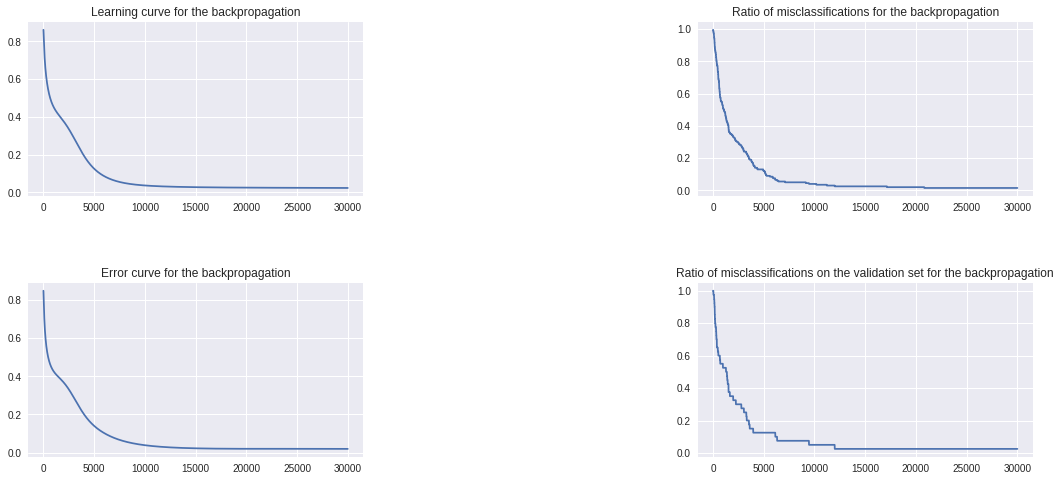

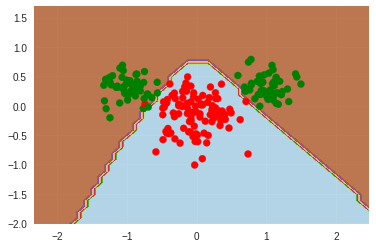

Number of hidden nodes:  6


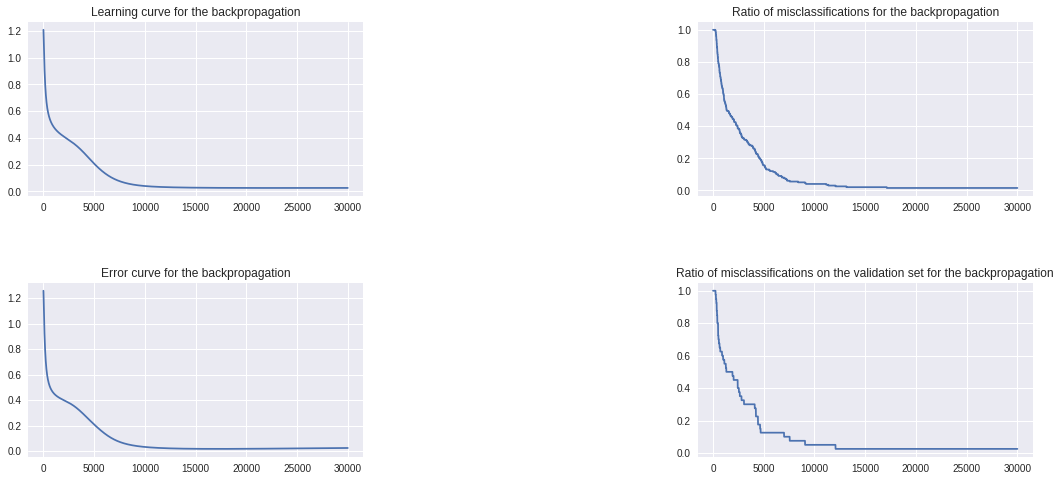

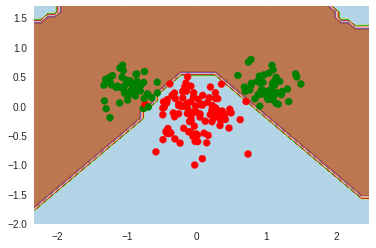

Number of hidden nodes:  10


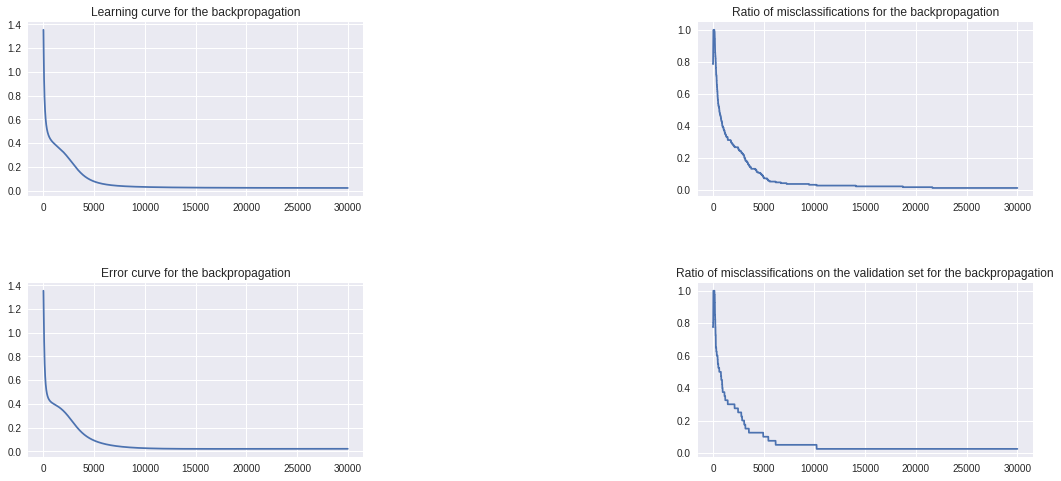

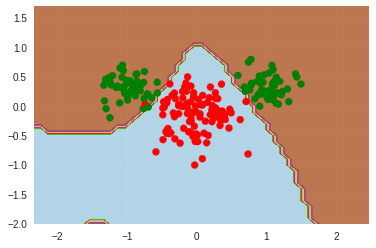

Number of hidden nodes:  15


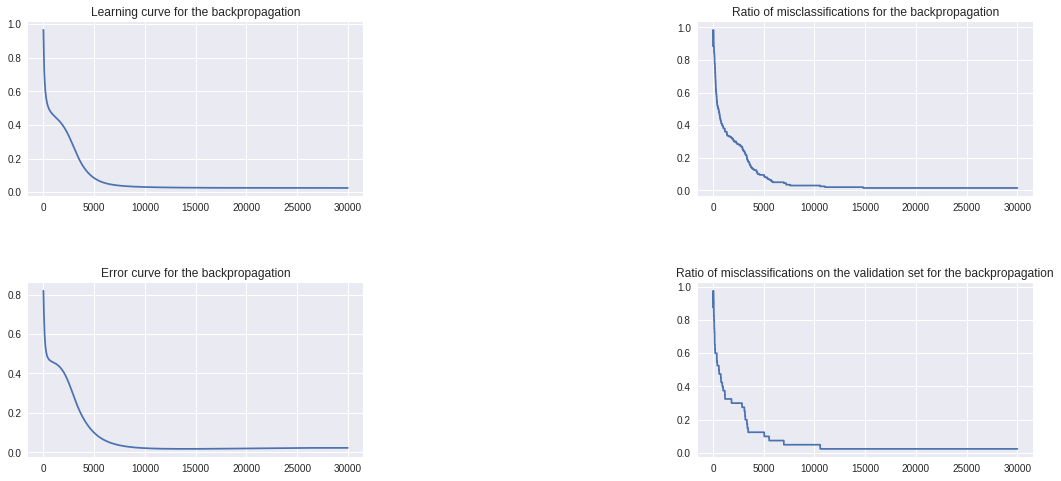

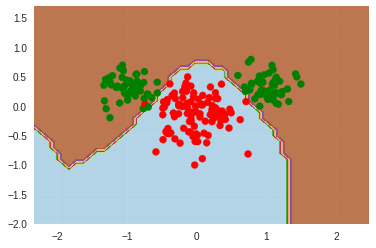

Number of hidden nodes:  25


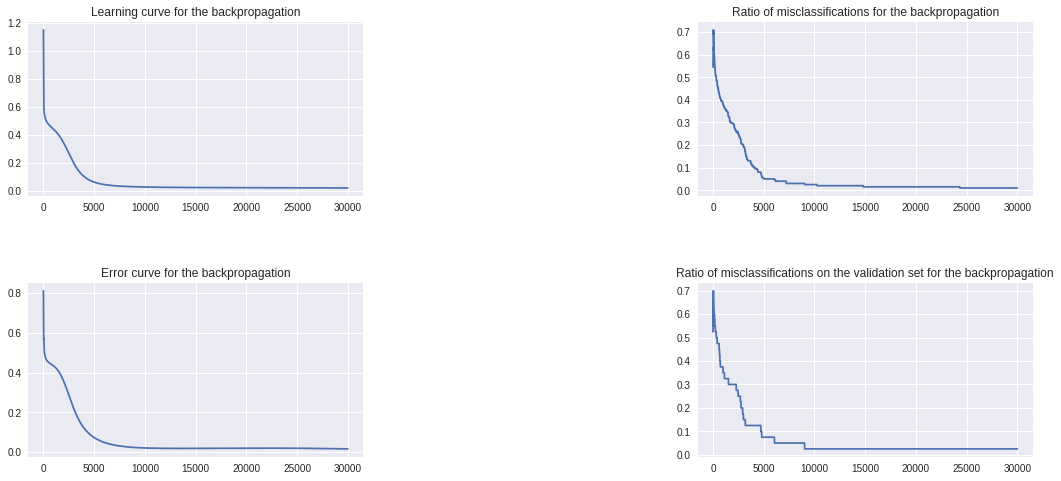

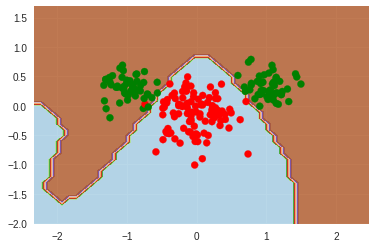

In [0]:
N_hidden_list=[5,6,10,15,25]
epochs=30000
eta=0.0005
for Nhidden in N_hidden_list:
  weights1=np.random.randn(Nhidden,np.shape(patterns)[0])
  weights2=np.random.randn(1,Nhidden+1)
  W,V,errors_list,misclassifications_list,all_weights1,all_weights2=backpropagation(patterns,targets,weights1,weights2,eta,epochs,Nhidden,alpha=0.9)
  errors_list_test,misclassifications_list_test=test(patterns_test,targets_test,epochs)
  
  print("Number of hidden nodes: ",Nhidden)
  
  fig, axes = plt.subplots(2, 2, figsize=(18, 8))
  axes[0][0].plot(errors_list)
  axes[0][0].set_title('Learning curve for the backpropagation')

  axes[0][1].plot(misclassifications_list)
  axes[0][1].axis('tight')
  axes[0][1].set_title('Ratio of misclassiﬁcations for the backpropagation')

  axes[1][0].plot(errors_list_test)
  axes[1][0].set_title('Error curve for the backpropagation')

  axes[1][1].plot(misclassifications_list_test)
  axes[1][1].axis('tight')
  axes[1][1].set_title('Ratio of misclassiﬁcations on the validation set for the backpropagation')
  plt.subplots_adjust(wspace=1)
  plt.subplots_adjust(hspace=0.5)
  plt.show()
  plot_decision_boundary(patterns,targets,points = True, h = 0.1)

# ***First Scenario :***

In [0]:
mA= [1, 0.3]
mB= [0, -0.1]
sigmaA=0.2
sigmaB=0.3
classA[0]= np.concatenate((np.random.randn(1,int(0.5*ndata))*sigmaA-mA[0],np.random.randn(1,int(0.5*ndata))*sigmaA+mA[0]),axis=1)
classB[0]= np.random.randn(1,ndata)*sigmaB +mB[0]
classA[1]= np.random.randn(1,ndata)*sigmaA +mA[1]
classB[1]= np.random.randn(1,ndata)*sigmaB +mB[1]
classA=classA.T
classB=classB.T
np.random.shuffle(classA)
np.random.shuffle(classB)
classA=classA.T
classB=classB.T

In [0]:
classA_train=classA[:,:int(0.75*ndata)]
classB_train=classB[:,:int(0.75*ndata)]
classA_test=classA[:,int(0.75*ndata):]
classB_test=classB[:,:int(0.75*ndata):]

In [0]:
patterns_train=np.concatenate((classA_train,classB_test),axis=1)
patterns_train=np.concatenate((patterns_train,np.ones((1,np.shape(patterns_train)[1]))))
targets_train=np.concatenate((np.ones(int(np.shape(classA_train)[1])),-np.ones(int(np.shape(classB_train)[1]))))
s = np.arange(patterns_train.shape[1])
np.random.shuffle(s)
patterns_train=patterns_train[:,s]
targets_train=targets_train[s]

patterns_test=np.concatenate((classA_test,classB_test),axis=1)
patterns_test=np.concatenate((patterns_test,np.ones((1,np.shape(patterns_test)[1]))))
targets_test=np.concatenate((np.ones(int(np.shape(classA_test)[1])),-np.ones(int(np.shape(classB_test)[1]))))
s = np.arange(patterns_test.shape[1])
np.random.shuffle(s)
patterns_test=patterns_test[:,s]
targets_test=targets_test[s]

In [0]:
weights1=np.random.randn(Nhidden,np.shape(patterns_train)[0])
weights2=np.random.randn(1,Nhidden+1)

In [0]:
W,V,errors_list,misclassifications_list,all_weights1,all_weights2=backpropagation(patterns_train,targets_train,weights1,weights2,eta,epochs,Nhidden,alpha=0.9)

In [0]:
errors_list_test,misclassifications_list_test=test(patterns_test,targets_test,epochs)

Number of hidden nodes:  5


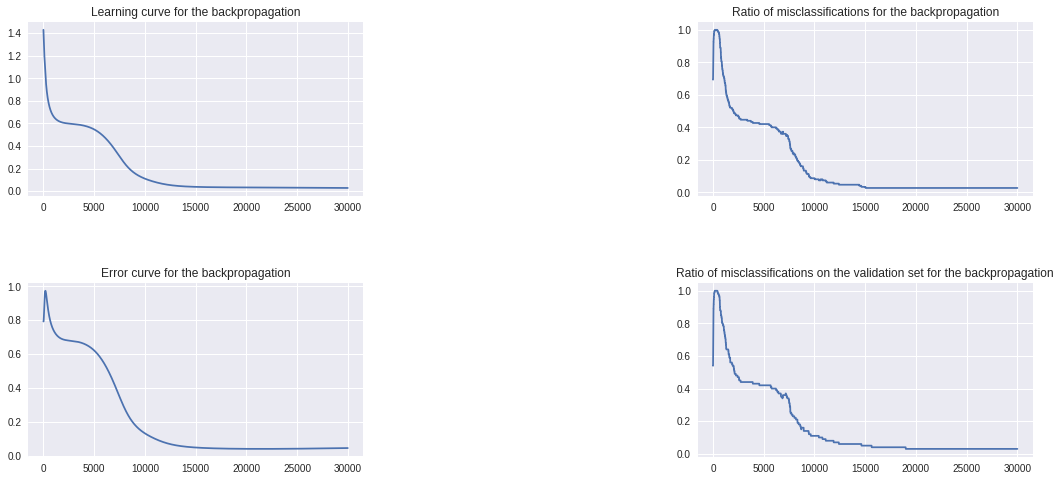

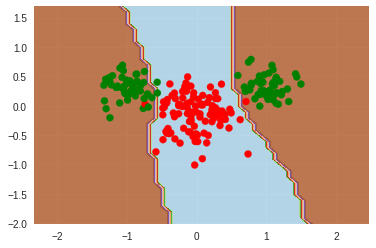

Number of hidden nodes:  6


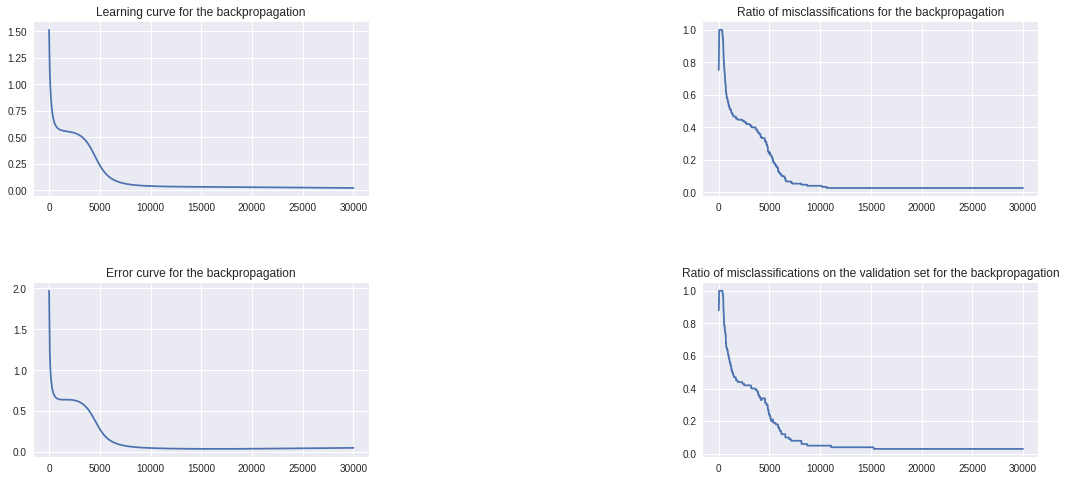

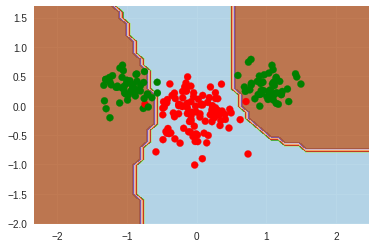

Number of hidden nodes:  10


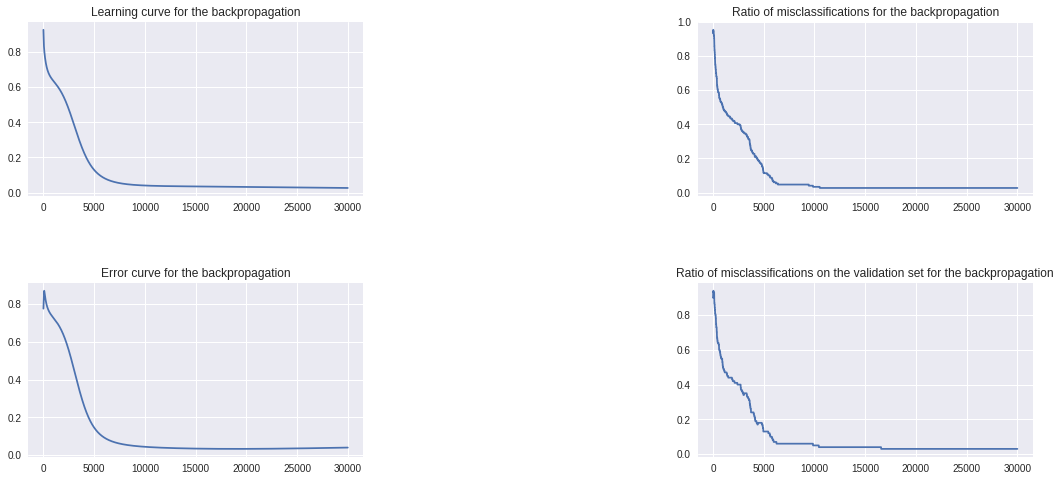

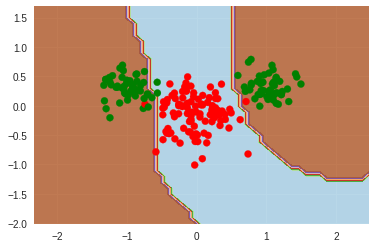

Number of hidden nodes:  15


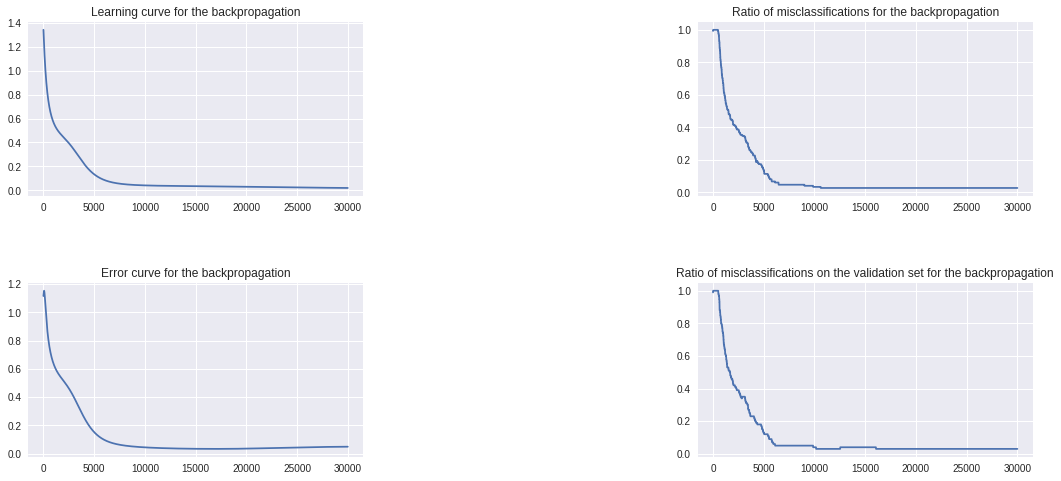

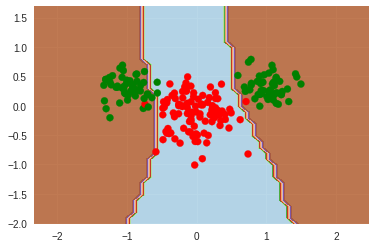

Number of hidden nodes:  25


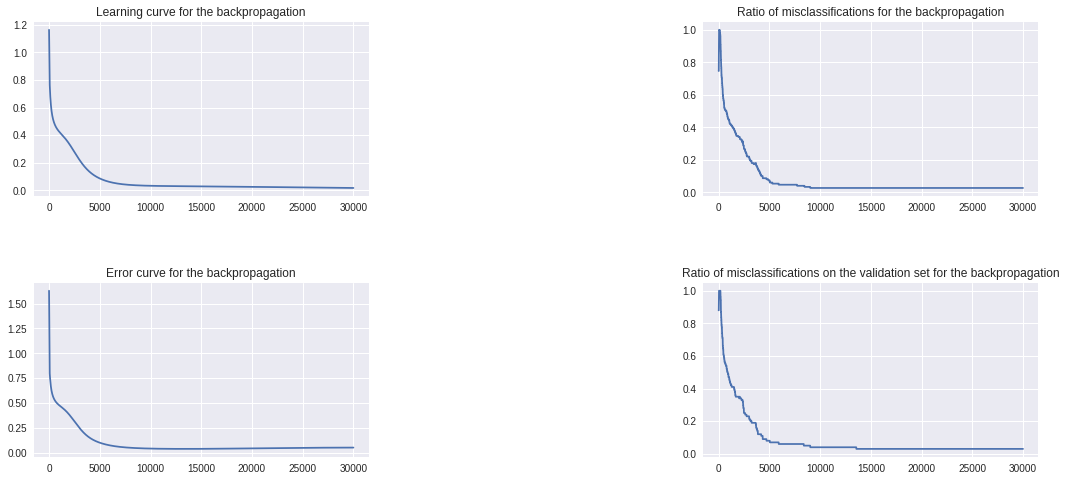

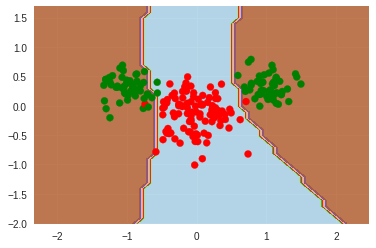

In [0]:
epochs=30000
eta=0.0005
for Nhidden in N_hidden_list:
  weights1=np.random.randn(Nhidden,np.shape(patterns_train)[0])
  weights2=np.random.randn(1,Nhidden+1)
  W,V,errors_list,misclassifications_list,all_weights1,all_weights2=backpropagation(patterns_train,targets_train,weights1,weights2,eta,epochs,Nhidden,alpha=0.9)
  errors_list_test,misclassifications_list_test=test(patterns_test,targets_test,epochs)
  
  print("Number of hidden nodes: ",Nhidden)
  
  fig, axes = plt.subplots(2, 2, figsize=(18, 8))
  axes[0][0].plot(errors_list)
  axes[0][0].set_title('Learning curve for the backpropagation')

  axes[0][1].plot(misclassifications_list)
  axes[0][1].axis('tight')
  axes[0][1].set_title('Ratio of misclassiﬁcations for the backpropagation')

  axes[1][0].plot(errors_list_test)
  axes[1][0].set_title('Error curve for the backpropagation')

  axes[1][1].plot(misclassifications_list_test)
  axes[1][1].axis('tight')
  axes[1][1].set_title('Ratio of misclassiﬁcations on the validation set for the backpropagation')
  plt.subplots_adjust(wspace=1)
  plt.subplots_adjust(hspace=0.5)
  plt.show()
  plot_decision_boundary(patterns,targets,points = True, h = 0.1)

# Second scenario :

In [0]:
classA_train=classA[:,:int(0.5*ndata)]
classB_train=classB
classA_test=classA[:,int(0.5*ndata):]

In [0]:
patterns_train=np.concatenate((classA_train,classB_train),axis=1)
patterns_train=np.concatenate((patterns_train,np.ones((1,np.shape(patterns_train)[1]))))
targets_train=np.concatenate((np.ones(np.shape(classA_train)[1]),-np.ones(np.shape(classB_train)[1])))
s = np.arange(patterns_train.shape[1])
np.random.shuffle(s)
patterns_train=patterns_train[:,s]
targets_train=targets_train[s]

patterns_test=np.concatenate((classA_test,np.ones((1,np.shape(classA_test)[1]))))
targets_test=np.ones((np.shape(classA_test)[1]))
s = np.arange(patterns_test.shape[1])
np.random.shuffle(s)
patterns_test=patterns_test[:,s]
targets_test=targets_test[s]

Number of hidden nodes:  5


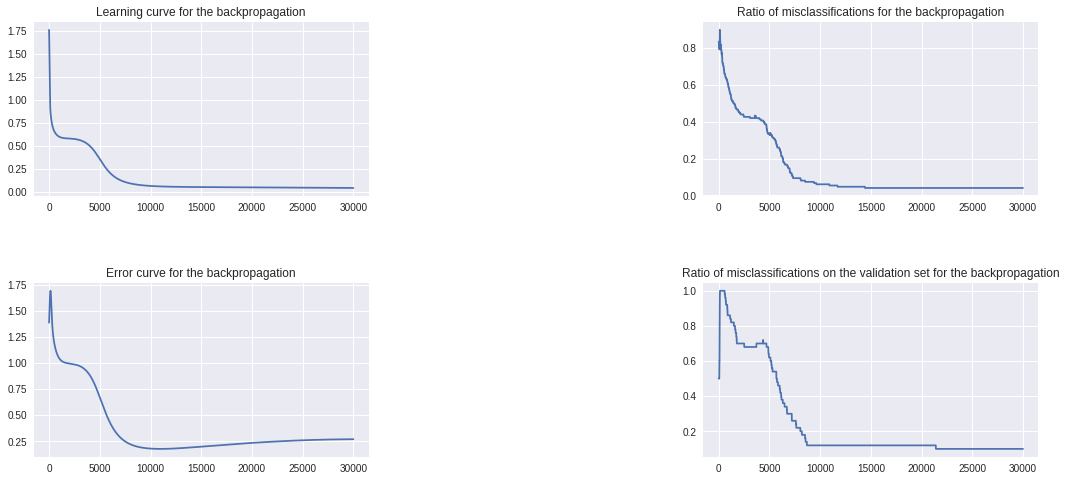

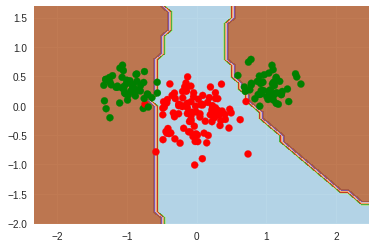

Number of hidden nodes:  6


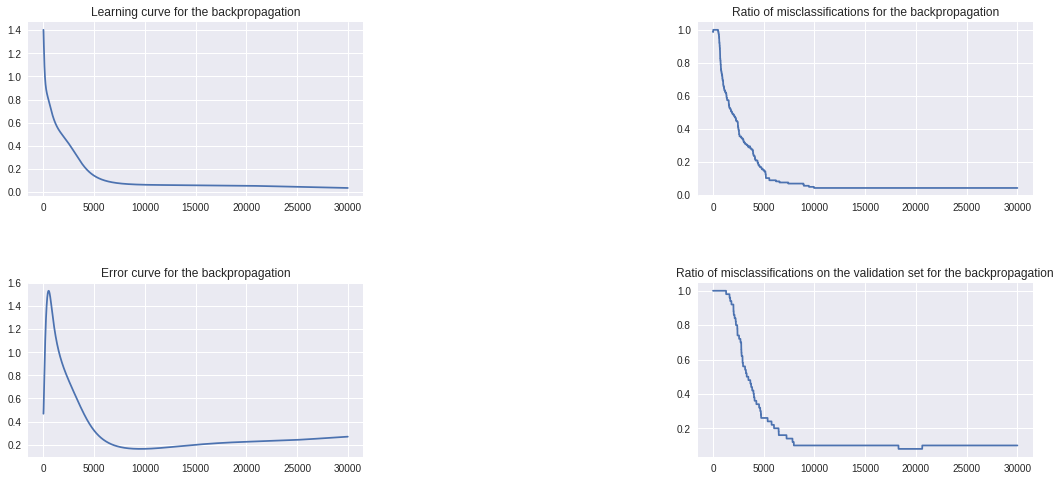

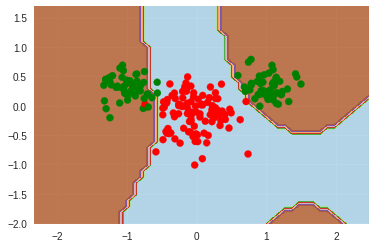

Number of hidden nodes:  10


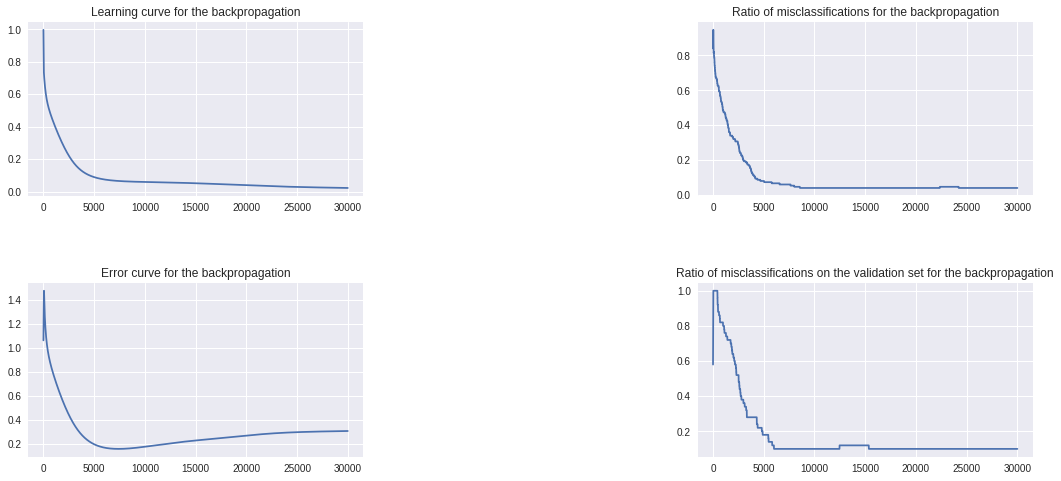

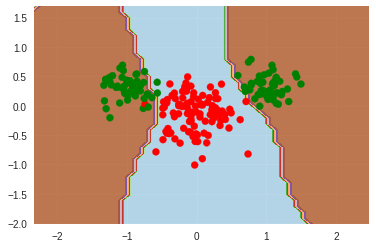

Number of hidden nodes:  15


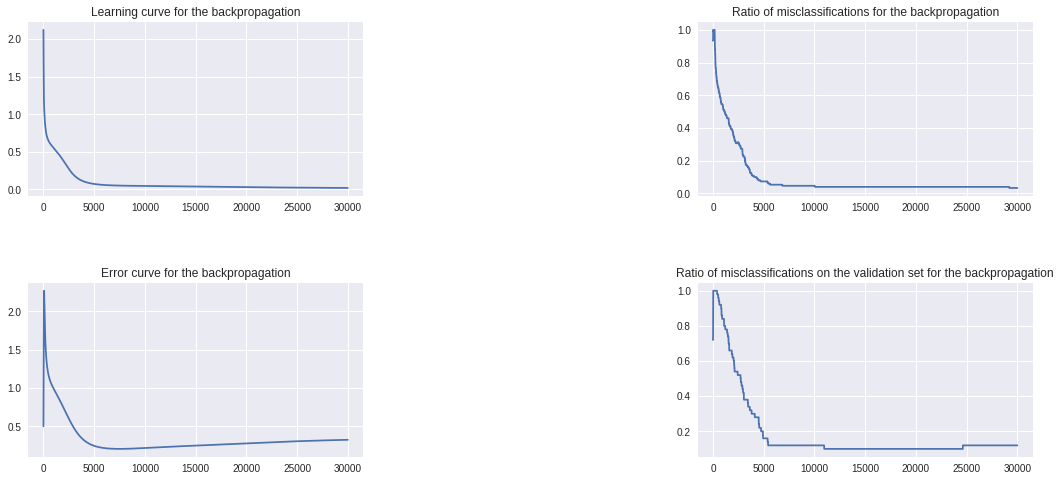

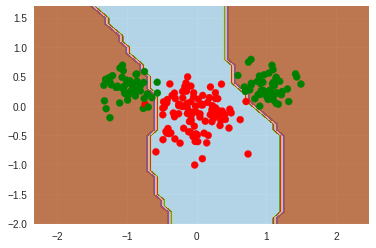

Number of hidden nodes:  25


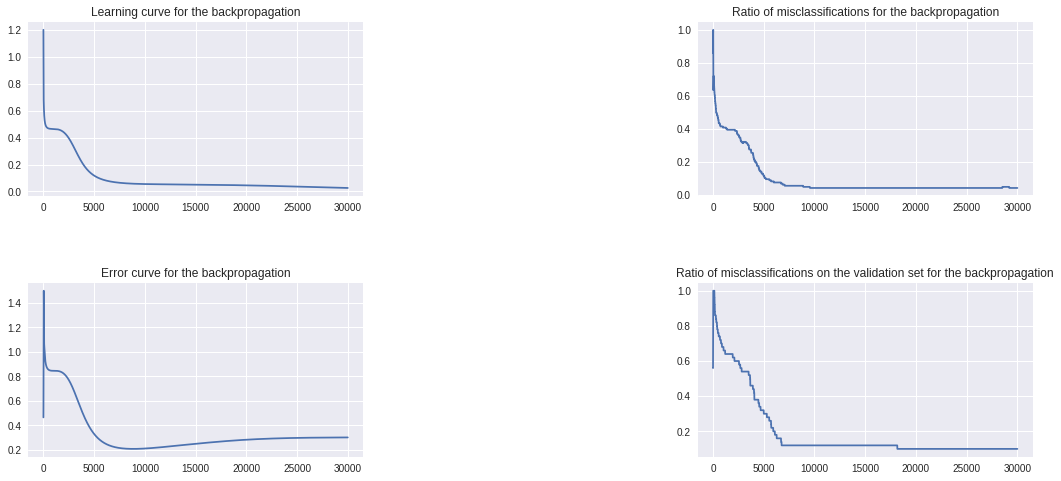

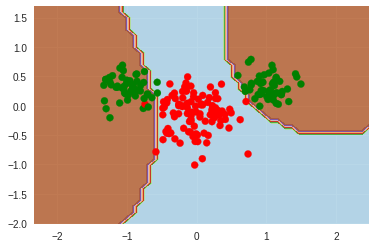

In [0]:
epochs=30000
for Nhidden in N_hidden_list:
  weights1=np.random.randn(Nhidden,np.shape(patterns_train)[0])
  weights2=np.random.randn(1,Nhidden+1)
  W,V,errors_list,misclassifications_list,all_weights1,all_weights2=backpropagation(patterns_train,targets_train,weights1,weights2,eta,epochs,Nhidden,alpha=0.9)
  errors_list_test,misclassifications_list_test=test(patterns_test,targets_test,epochs)
  
  print("Number of hidden nodes: ",Nhidden)
  
  fig, axes = plt.subplots(2, 2, figsize=(18, 8))
  axes[0][0].plot(errors_list)
  axes[0][0].set_title('Learning curve for the backpropagation')

  axes[0][1].plot(misclassifications_list)
  axes[0][1].axis('tight')
  axes[0][1].set_title('Ratio of misclassiﬁcations for the backpropagation')

  axes[1][0].plot(errors_list_test)
  axes[1][0].set_title('Error curve for the backpropagation')

  axes[1][1].plot(misclassifications_list_test)
  axes[1][1].axis('tight')
  axes[1][1].set_title('Ratio of misclassiﬁcations on the validation set for the backpropagation')
  plt.subplots_adjust(wspace=1)
  plt.subplots_adjust(hspace=0.5)
  plt.show()
  plot_decision_boundary(patterns,targets,points = True, h = 0.1)

# Third Scenario :

In [0]:
classB_train=classB[:,:int(0.5*ndata)]
classA_train=classA
classB_test=classB[:,int(0.5*ndata):]

patterns_train=np.concatenate((classA_train,classB_train),axis=1)
patterns_train=np.concatenate((patterns_train,np.ones((1,np.shape(patterns_train)[1]))))
targets_train=np.concatenate((np.ones(np.shape(classA_train)[1]),-np.ones(np.shape(classB_train)[1])))
s = np.arange(patterns_train.shape[1])
np.random.shuffle(s)
patterns_train=patterns_train[:,s]
targets_train=targets_train[s]

patterns_test=np.concatenate((classA_test,np.ones((1,np.shape(classA_test)[1]))))
targets_test=np.ones((np.shape(classA_test)[1]))
s = np.arange(patterns_test.shape[1])
np.random.shuffle(s)
patterns_test=patterns_test[:,s]
targets_test=targets_test[s]

Number of hidden nodes:  5


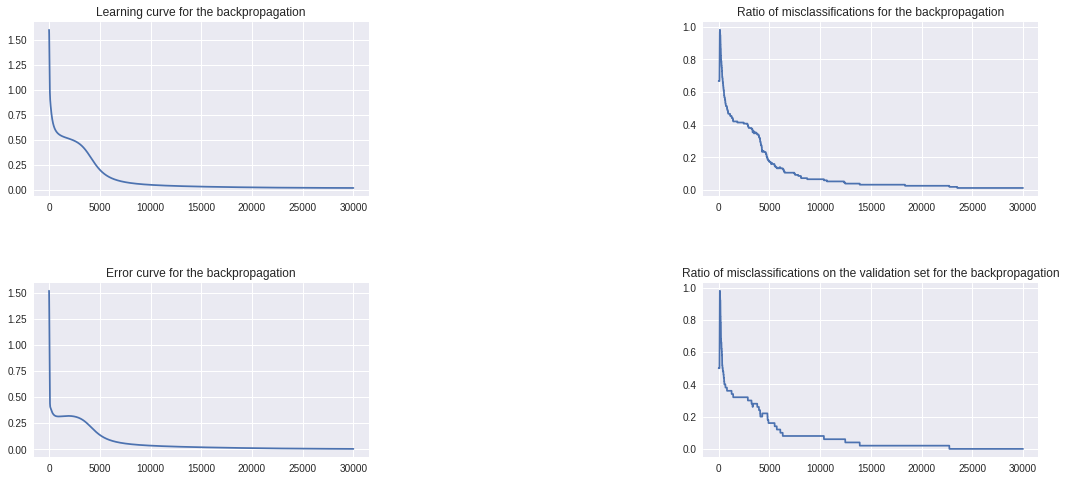

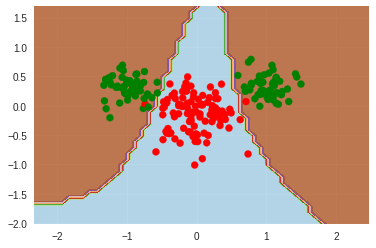

Number of hidden nodes:  6


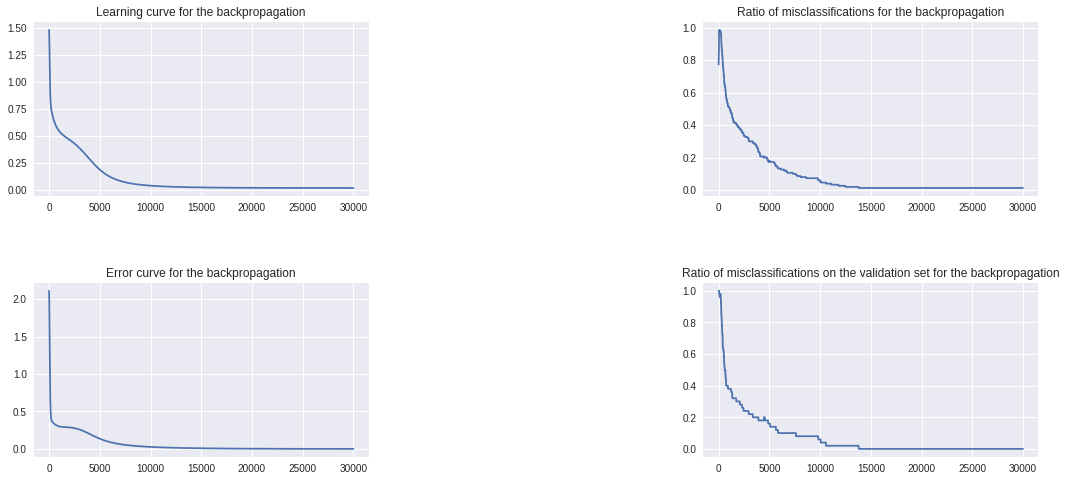

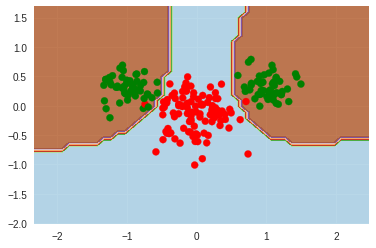

Number of hidden nodes:  10


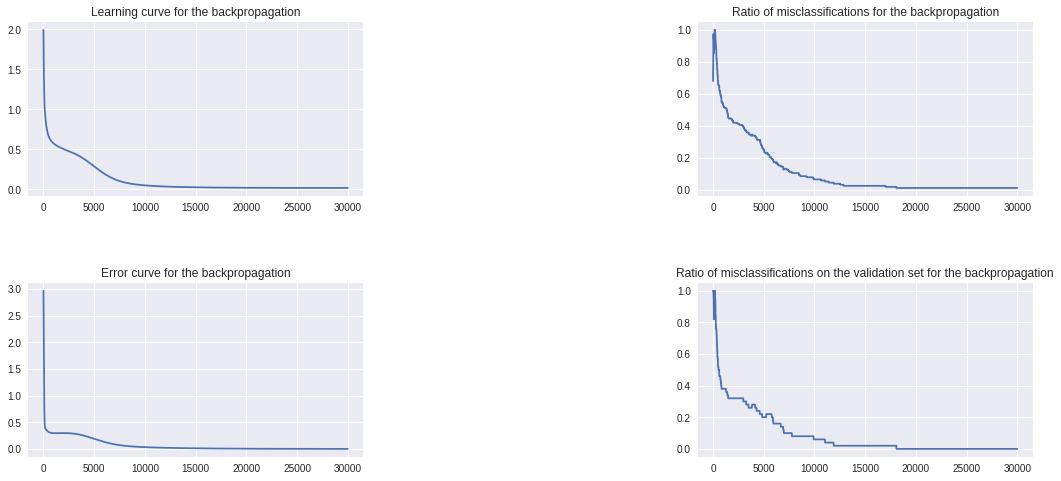

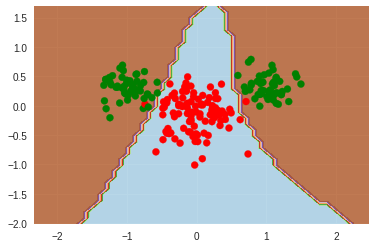

Number of hidden nodes:  15


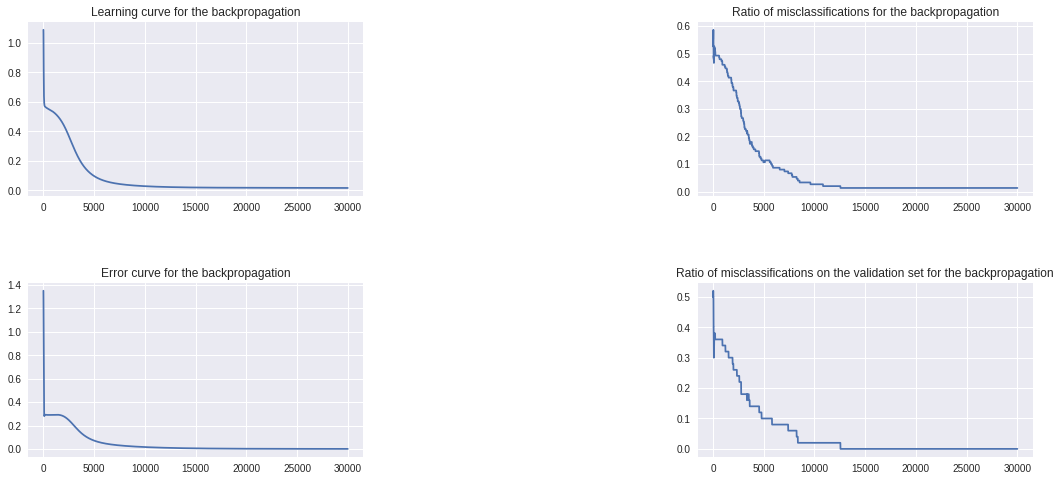

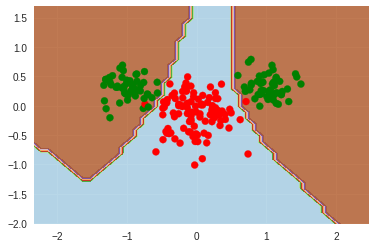

Number of hidden nodes:  25


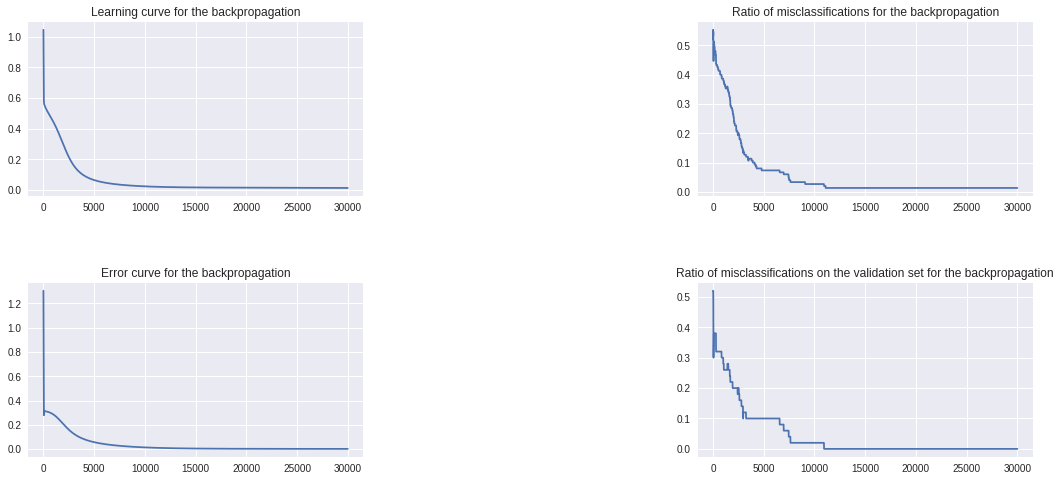

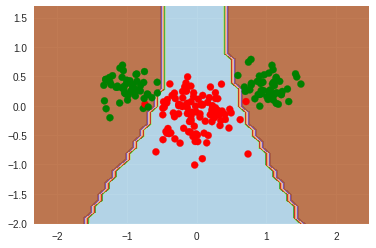

In [0]:
epochs=30000
for Nhidden in N_hidden_list:
  weights1=np.random.randn(Nhidden,np.shape(patterns_train)[0])
  weights2=np.random.randn(1,Nhidden+1)
  W,V,errors_list,misclassifications_list,all_weights1,all_weights2=backpropagation(patterns_train,targets_train,weights1,weights2,eta,epochs,Nhidden,alpha=0.9)
  errors_list_test,misclassifications_list_test=test(patterns_test,targets_test,epochs)
  
  print("Number of hidden nodes: ",Nhidden)
  
  fig, axes = plt.subplots(2, 2, figsize=(18, 8))
  axes[0][0].plot(errors_list)
  axes[0][0].set_title('Learning curve for the backpropagation')

  axes[0][1].plot(misclassifications_list)
  axes[0][1].axis('tight')
  axes[0][1].set_title('Ratio of misclassiﬁcations for the backpropagation')

  axes[1][0].plot(errors_list_test)
  axes[1][0].set_title('Error curve for the backpropagation')

  axes[1][1].plot(misclassifications_list_test)
  axes[1][1].axis('tight')
  axes[1][1].set_title('Ratio of misclassiﬁcations on the validation set for the backpropagation')
  plt.subplots_adjust(wspace=1)
  plt.subplots_adjust(hspace=0.5)
  plt.show()
  plot_decision_boundary(patterns,targets,points = True, h = 0.1)

# Fourth scenario :

In [0]:
epochs=30000

In [0]:
j=0
k=0
neg=np.zeros([2,ndata])
pos=np.zeros([2,ndata])
for i in range(np.shape(classA)[1]):
  if classA[0][i] <0:
    neg[:,j]=classA[:,i]
    j+=1
  else:
    pos[:,k]=classA[:,i]
    k+=1
pos=pos[:,:k]
neg=neg[:,:j]
pos_train=pos[:,:int(0.2*np.shape(pos[:,:50])[1])]
neg_train=neg[:,:int(0.8*np.shape(neg[:,:50])[1])]
classA_train=np.concatenate((pos_train,neg_train),axis=1)
classB_train=classB

pos_test=pos[:,int(0.2*np.shape(pos[:,:50])[1]):]
neg_test=neg[:,int(0.8*np.shape(neg[:,:50])[1]):]
classA_test=np.concatenate((pos_test,neg_test),axis=1)

In [0]:
patterns_train=np.concatenate((classA_train,classB_train),axis=1)
patterns_train=np.concatenate((patterns_train,np.ones((1,np.shape(patterns_train)[1]))))
targets_train=np.concatenate((np.ones(np.shape(classA_train)[1]),-np.ones(np.shape(classB_train)[1])))
s = np.arange(patterns_train.shape[1])
np.random.shuffle(s)
patterns_train=patterns_train[:,s]
targets_train=targets_train[s]

patterns_test=np.concatenate((classA_test,np.ones((1,np.shape(classA_test)[1]))))
targets_test=np.ones((np.shape(classA_test)[1]))
s = np.arange(patterns_test.shape[1])
np.random.shuffle(s)
patterns_test=patterns_test[:,s]
targets_test=targets_test[s]

Number of hidden nodes:  5


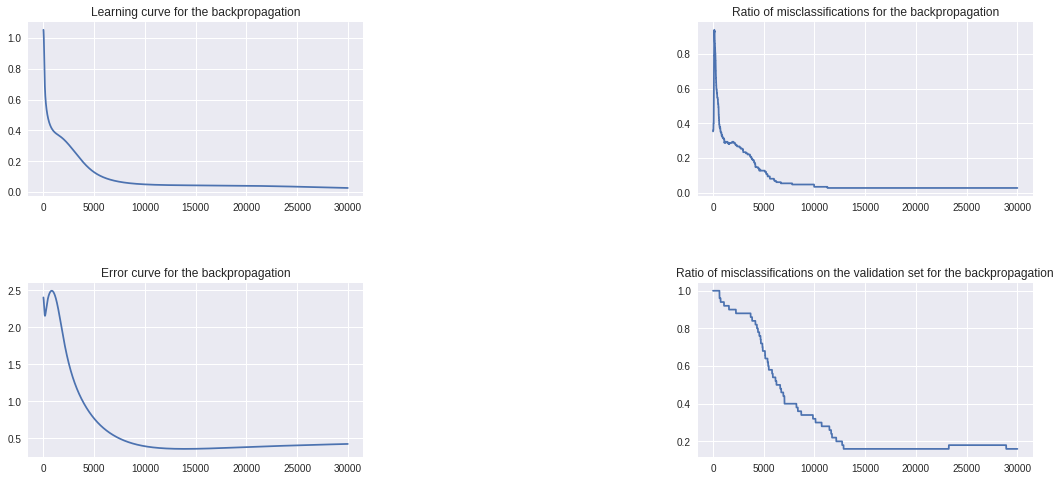

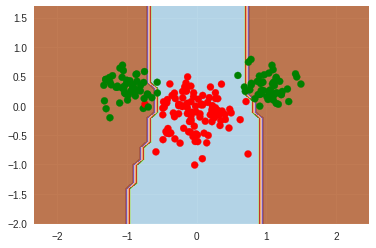

Number of hidden nodes:  6


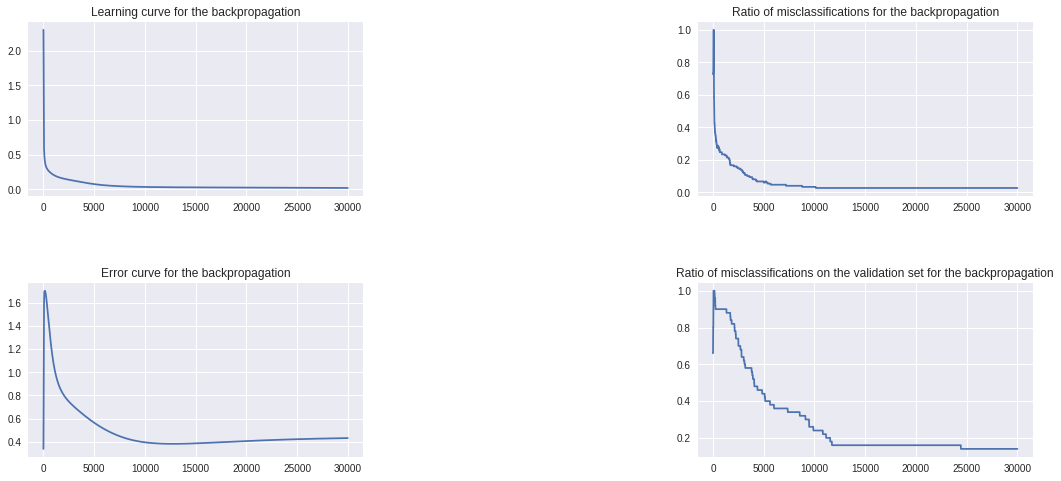

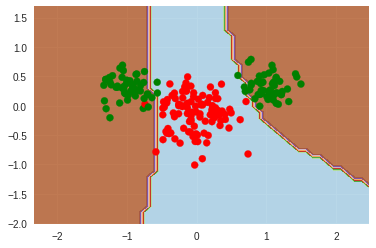

Number of hidden nodes:  10


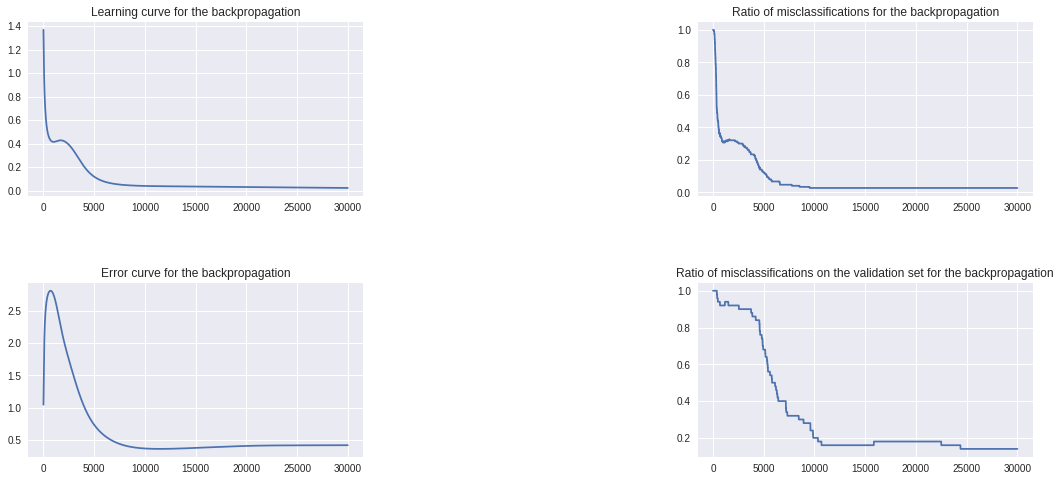

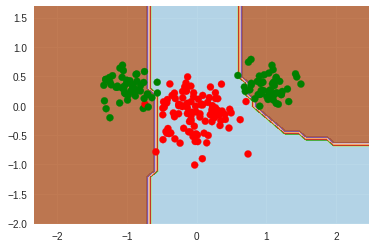

Number of hidden nodes:  15


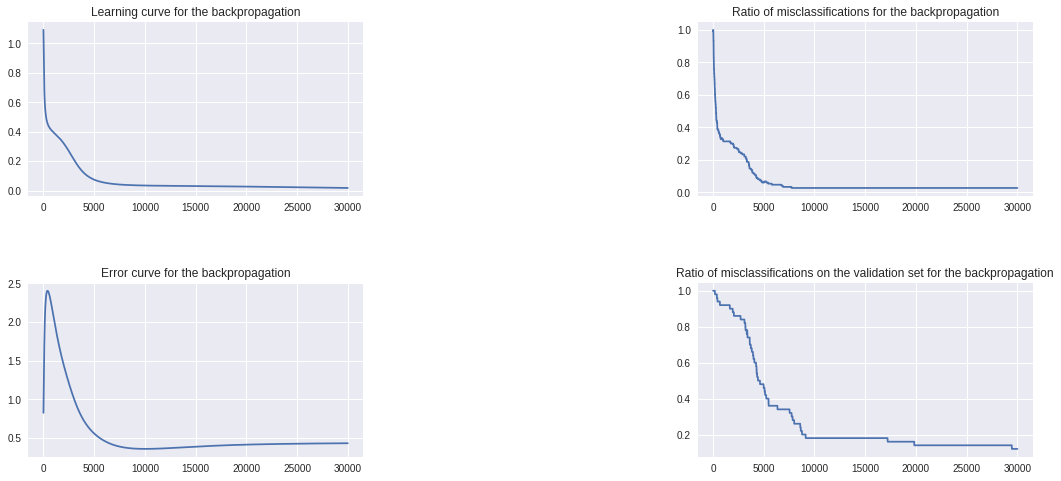

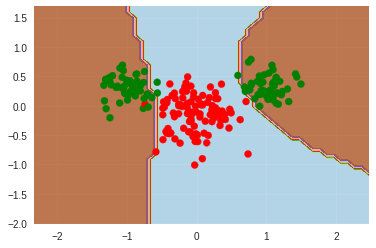

Number of hidden nodes:  25


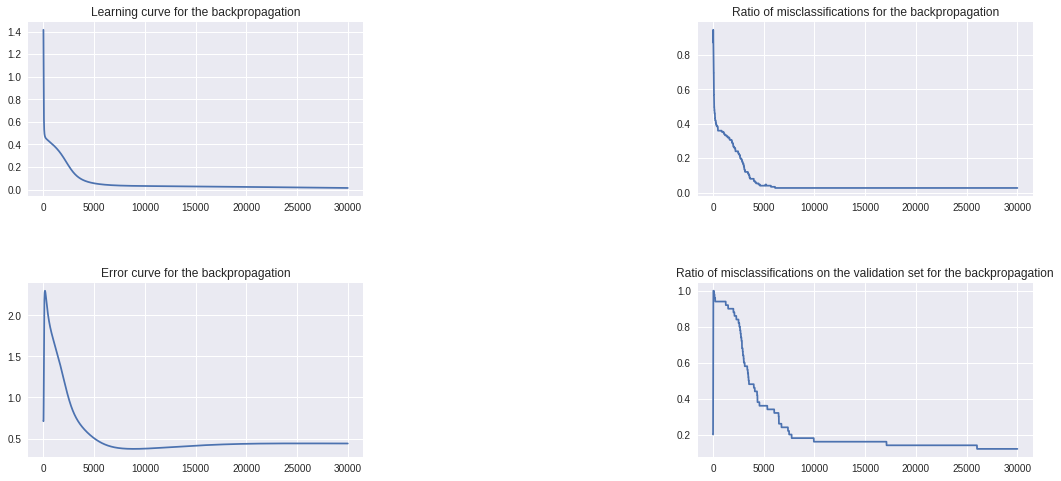

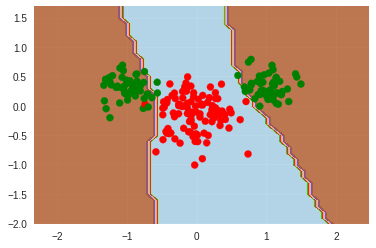

In [0]:
for Nhidden in N_hidden_list:
  weights1=np.random.randn(Nhidden,np.shape(patterns_train)[0])
  weights2=np.random.randn(1,Nhidden+1)
  W,V,errors_list,misclassifications_list,all_weights1,all_weights2=backpropagation(patterns_train,targets_train,weights1,weights2,eta,epochs,Nhidden,alpha=0.9)
  errors_list_test,misclassifications_list_test=test(patterns_test,targets_test,epochs)
  
  print("Number of hidden nodes: ",Nhidden)
  
  fig, axes = plt.subplots(2, 2, figsize=(18, 8))
  axes[0][0].plot(errors_list)
  axes[0][0].set_title('Learning curve for the backpropagation')

  axes[0][1].plot(misclassifications_list)
  axes[0][1].axis('tight')
  axes[0][1].set_title('Ratio of misclassiﬁcations for the backpropagation')

  axes[1][0].plot(errors_list_test)
  axes[1][0].set_title('Error curve for the backpropagation')

  axes[1][1].plot(misclassifications_list_test)
  axes[1][1].axis('tight')
  axes[1][1].set_title('Ratio of misclassiﬁcations on the validation set for the backpropagation')
  plt.subplots_adjust(wspace=1)
  plt.subplots_adjust(hspace=0.5)
  plt.show()
  plot_decision_boundary(patterns,targets,points = True, h = 0.1)

It seems that a too high value for the number of hidden nodes leads to a phenomenon of overfitting.

### Is there any difference between a batch and sequential learning approach in terms of the validation performance?

### The encoder problem

In [0]:
input = np.eye(8)


In [0]:
classA = input
classB = input

eta=0.001
Nhidden=3
epochs=2000
patterns = classA
patterns=np.concatenate((patterns,np.ones((1,np.shape(patterns)[1]))))
targets=np.concatenate((np.ones(np.shape(classA)[1]),-np.ones(np.shape(classB)[1])))
s = np.arange(patterns.shape[1])
np.random.shuffle(s)
patterns=patterns[:,s]
targets=targets[s]

In [0]:
patterns_train=patterns
patterns_test=patterns

In [0]:
def weightsInit(Ν, Μ):
    """
    params:
    N: # of columns of the input patterns
    M: # of the outputs (# of rows of the output)
    """
    # np.random.seed(5)
    return np.random.rand(Ν, Μ)
  



weights1 = weightsInit(9, 3)
weights2 = weightsInit(4, 8)

def backProp(X, X_test, bias, T, T_test, W, V, a, eta, nodes, epochs, test):
    dW, dV = 0., 0.
    W_ls, V_ls, train_error, test_error = [], [], [], []
    
    for epoch in range(epochs):
        print('epoch = ', epoch + 1)
        delta, delta_h, hout, out = bwdPass(X, T, W, V, nodes)

        #--- Weight update
        dW = (dW * a) - np.dot(delta_h, X.T) * (1 - a)
        dV = (dV * a) - np.dot(delta, hout.T) * (1 - a)
        W = W + dW.T * eta
        V = V + dV.T * eta
        W_ls.append(W)
        V_ls.append(V)
        
        #--- find the training error
        pred = np.where(out >= 0., 1, -1)
        train_error.append((np.sum((pred - T)**2))/2.)

        if test == 'On':
            #--- feed forward
            out_test, _, _, _ = fwdPass(X_test, W_ls[epoch], V_ls[epoch])
            #--- compute missclassified points and error ratio
            pred = np.where(out_test >= 0., 1, -1)
            test_error.append((np.sum((pred - T_test)**2))/2.)
    
    #--- find the best (minimum error) weights 
    min_error_idx = np.argmin(train_error)
    W_best = W_ls[min_error_idx]
    V_best = V_ls[min_error_idx]
    
    return W_ls, V_ls, W_best, V_best, train_error, test_error

In [0]:
W,V,errors_list,misclassifications_list,all_weights1,all_weights2=backpropagation(patterns_train,targets_train,weights1,weights2,eta,epochs,Nhidden,alpha=0.9)

ValueError: ignored

In [0]:
def test(W,V):
  I = np.eye(8)
  N = 0
  for i in range(8):
    N += 1* np.array_equal(I[:,i],  W[:,i])
  return (1-N/8)



In [0]:
error = test(W,V)

NameError: ignored

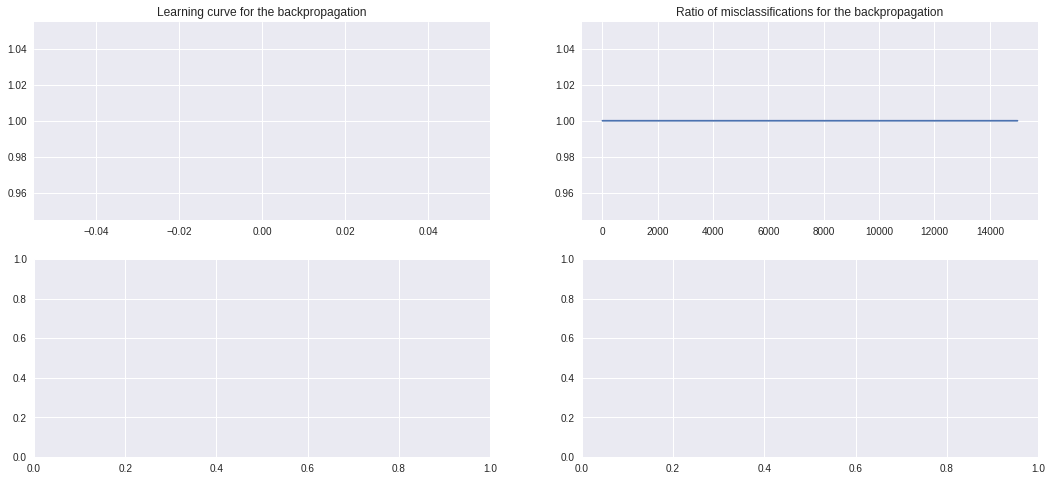

In [0]:
fig, axes = plt.subplots(2, 2, figsize=(18, 8))
axes[0][0].plot(error)
axes[0][0].set_title('Learning curve for the backpropagation')

axes[0][1].plot(misclassifications_list)
axes[0][1].axis('tight')
axes[0][1].set_title('Ratio of misclassiﬁcations for the backpropagation')

axes[1][0].plot(errors_list_test)
axes[1][0].set_title('Error curve for the backpropagation')

axes[1][1].plot(misclassifications_list_test)
axes[1][1].axis('tight')
axes[1][1].set_title('Ratio of misclassiﬁcations on the validation set for the backpropagation')
plt.subplots_adjust(wspace=1)
plt.subplots_adjust(hspace=0.5)
plt.show()

• The purpose of autoencoders is to encode low-dimensional representations : with only 3 nodes, we were able to produce a representation where the eight-dimensional input patterns are represented in the three-dimensional space.

## Function approximation

### Generate function data

In [0]:
def f(x,y):
  argument=x**2+y**2
  return np.exp(-(argument)/10)-0.5

In [0]:
x=np.arange(-5,5,0.5)
y=np.arange(-5,5,0.5)

In [0]:
x_test=np.arange(-5,5,0.5)+0.25
y_test=np.arange(-5,5,0.5)+0.25

In [0]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

In [0]:
X1, Y1 = np.meshgrid(x, y)
X1_test, Y1_test = np.meshgrid(x_test,y_test)

Z=f(X1,Y1)
Z_test=f(X1_test,Y1_test)
ndata=len(X1)*len(Y1)
ndata_test=len(X1_test)*len(Y1_test)

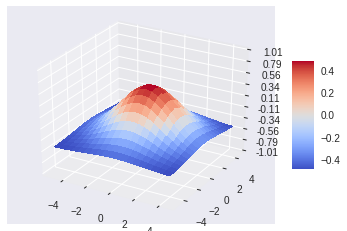

In [0]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# Plot the surface.

surf = ax.plot_surface(X1, Y1, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)


# Customize the z axis.

ax.set_zlim(-1.01, 1.01)

ax.zaxis.set_major_locator(LinearLocator(10))

ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))


# Add a color bar which maps values to colors.

fig.colorbar(surf, shrink=0.5, aspect=5)


plt.show()

In [0]:
targets = Z.reshape(1,ndata).copy()

In [0]:
targets_test = Z_test.reshape(1,ndata).copy()

In [0]:
patterns = np.vstack([np.reshape(X1,(1,ndata)),np.reshape(Y1, (1,ndata))])

In [0]:
patterns = np.vstack([patterns, np.ones(patterns.shape[1])])

In [0]:
patterns_test = np.vstack([np.reshape(X1_test,(1,ndata)),np.reshape(Y1_test, (1,ndata))])

In [0]:
patterns_test = np.vstack([patterns_test, np.ones(patterns_test.shape[1])])

### Train the network and visalise the approximated function

In [0]:
gridsize=np.shape(X1)[0]
Nhidden=16
eta=0.0007
epochs=10000

In [0]:
weights1=np.random.randn(Nhidden,np.shape(patterns)[0])
weights2=np.random.randn(1,Nhidden+1)

In [0]:
def phi(x):
  return 2/(1+np.exp(-x))-1

In [0]:
def phi_prime(x):
  return 0.5*((1+phi(x))*(1-phi(x)))

In [0]:
def forward_3D(X,W,V,display):
  WX=W.dot(X)
  H=phi(WX)
  H=np.vstack([H,np.ones(np.shape(H)[1])])
  VH=V.dot(H)
  O=phi(VH)
  gridsize=np.shape(X1)[1]
  zz=0
  if display:
    zz=O.reshape(gridsize,gridsize)

  return O,H,zz

In [0]:
def backward(T,O,H,V,Nhidden):
  delta_o = (O-T)* (phi_prime(O))
  delta_h=np.dot(V.T,delta_o)*(phi_prime(H))
  delta_h=delta_h[0:-1]
  return delta_o,delta_h

In [0]:
def weightUpdate(delta_o,delta_h,X,H,W,V,eta,dw,dv,alpha):
  dw= alpha*dw-(1-alpha)*(delta_h.dot(X.T))
  W=W+eta*dw
  V=V+eta*dv
  return W,V,dw,dv

In [0]:
def backpropagation_3D(X,X_test,T,T_test,W,V,eta,epochs,Nhidden,alpha=0.9,display=False):
  outputs=[]
  errors_list=[]
  misclassifications_list=[]
  dw=np.ones(np.shape(W))
  dv=np.ones(np.shape(V))
  all_weights1=[]
  all_weights2=[]
  for i in range(epochs):
    all_weights1.append(W)
    all_weights2.append(V)
    O,H,_=forward_3D(X,W,V,display)
    _,_,zz=forward_3D(X_test,W,V,display)
    if display:
      outputs.append(zz)
    
    number_misclassifications=np.shape(X)[1]-np.sum(np.round(O)==T)
    ratio=number_misclassifications/(np.shape(X)[1])
    misclassifications_list.append(ratio)
    errors_list.append(np.mean(np.square(O-T)))
    
    delta_o,delta_h=backward(T,O,H,V,Nhidden)
    
    W,V,dw,dv=weightUpdate(delta_o,delta_h,X,H,W,V,eta,dw,dv,alpha)
    
  all_weights1.append(W)
  all_weights2.append(V)
  output_test,_,_=forward_3D(X_test,W,V,display)
  MSE=np.mean(np.square(output_test-T_test))
  #print((np.square(O-T)))
  return W,V,errors_list,misclassifications_list,all_weights1,all_weights2,outputs,MSE
 

In [0]:
W,V,errors_list,misclassifications_list,all_weights1,all_weights2,outputs,MSE=backpropagation_3D(patterns,patterns_test,targets,targets_test,weights1,weights2,eta,epochs,Nhidden,alpha=0.9,display=True)

0.0009773916264289506


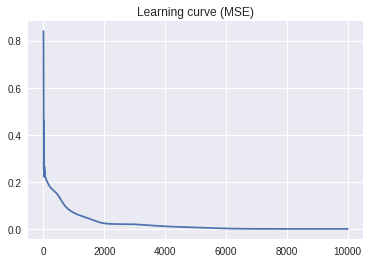

In [0]:
plt.plot(errors_list)
print(MSE)
plt.title("Learning curve (MSE)")
plt.show()

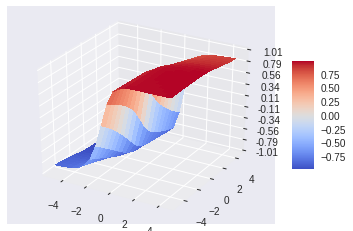

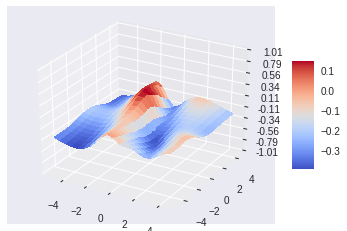

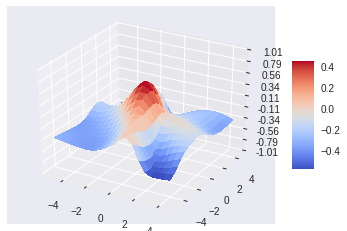

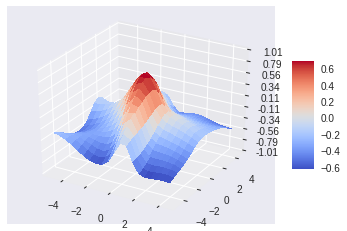

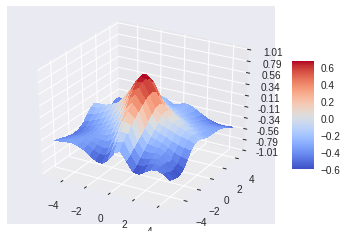

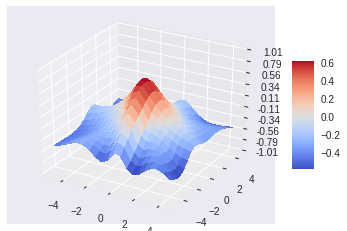

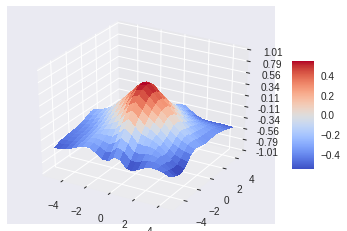

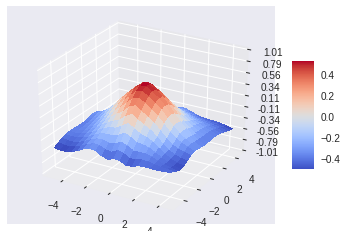

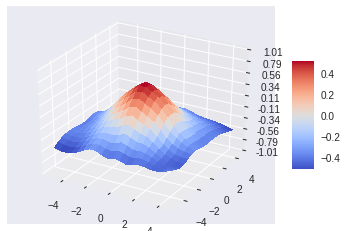

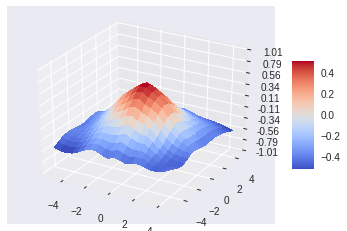

In [0]:
for i in range(np.shape(outputs)[0]):
  if i%1000==0:
    zz=outputs[i]
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    # Plot the surface.

    surf = ax.plot_surface(X1, Y1, zz, cmap=cm.coolwarm,linewidth=0, antialiased=False)


    # Customize the z axis.

    ax.set_zlim(-1.01, 1.01)

    ax.zaxis.set_major_locator(LinearLocator(10))

    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))


    # Add a color bar which maps values to colors.

    fig.colorbar(surf, shrink=0.5, aspect=5)


    plt.show()

#### Model comparison : different numbers of nodes

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


TypeError: ignored

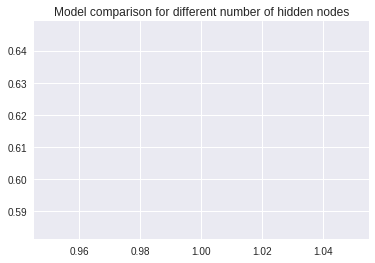

In [0]:
MSE_list=[]
for Nhidden in range(1,2):
  weights1=np.random.randn(Nhidden,np.shape(patterns)[0])
  weights2=np.random.randn(1,Nhidden+1)
  W,V,errors_list,misclassifications_list,all_weights1,all_weights2,outputs,MSE=backpropagation_3D(patterns,patterns_test,targets,targets_test,weights1,weights2,eta,epochs,Nhidden,alpha=0.9)
  MSE_list.append(errors_list[-1])
plt.plot(range(1,2),MSE_list)
plt.title("Model comparison for different number of hidden nodes")
plt.xlabel("Number of hidden nodes")
plt.ylabel("MSE")
plt.show()

Thee is some outliers, it is due to random. 
Else, we can notice that the network needs at least 12 hidden nodes to correctly approximate the gaussian function

In [0]:
np.argmin(MSE_list)

20

The number of hidden nodes is  3
The MSE equals  0.03904652313494096


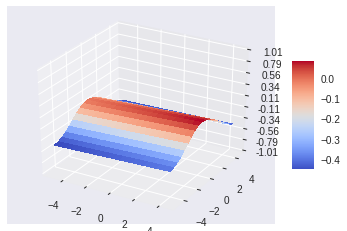

The number of hidden nodes is  5
The MSE equals  0.041709938900490545


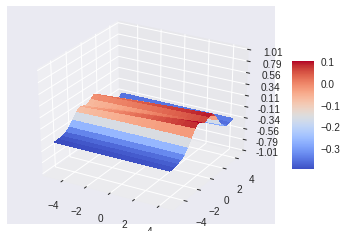

The number of hidden nodes is  10
The MSE equals  0.0015637006670018987


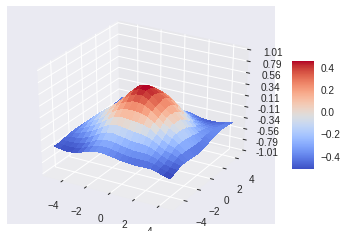

The number of hidden nodes is  20
The MSE equals  0.0018402677229499642


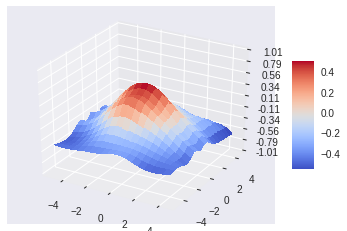

The number of hidden nodes is  30
The MSE equals  0.020961934993316497


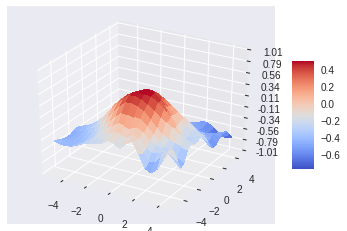

The number of hidden nodes is  40
The MSE equals  0.07963810358383286


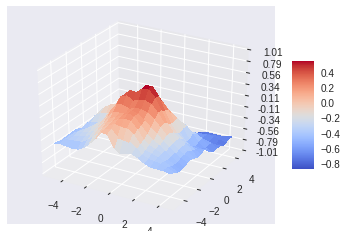

The number of hidden nodes is  50
The MSE equals  0.3849235323725873


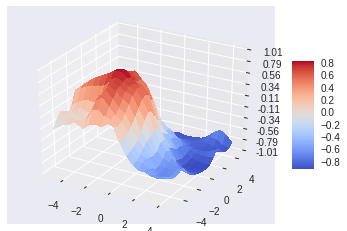

In [0]:
for Nhidden in [3,5,10,20,30,40,50]:
  weights1=np.random.randn(Nhidden,np.shape(patterns)[0])
  weights2=np.random.randn(1,Nhidden+1)
  W,V,errors_list,misclassifications_list,all_weights1,all_weights2,outputs,MSE=backpropagation_3D(patterns,patterns_test,targets,targets_test,weights1,weights2,eta,epochs,Nhidden,alpha=0.9,display=True)
  zz=outputs[-1]
  print("The number of hidden nodes is ",Nhidden)
  print("The MSE equals ",MSE)
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  # Plot the surface.

  surf = ax.plot_surface(X1, Y1, zz, cmap=cm.coolwarm,linewidth=0, antialiased=False)


  # Customize the z axis.

  ax.set_zlim(-1.01, 1.01)

  ax.zaxis.set_major_locator(LinearLocator(10))

  ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))


  # Add a color bar which maps values to colors.

  fig.colorbar(surf, shrink=0.5, aspect=5)


  plt.show()

The best model is when the number of hidden nodes equals  
>$np.argmin(MSE_list)




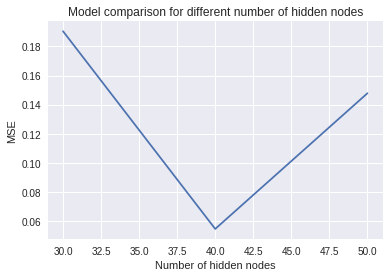

In [0]:
MSE_list=[]
for Nhidden in [30,40,50]:
  weights1=np.random.randn(Nhidden,np.shape(patterns)[0])
  weights2=np.random.randn(1,Nhidden+1)
  W,V,errors_list,misclassifications_list,all_weights1,all_weights2,outputs,MSE=backpropagation_3D(patterns,patterns_test,targets,targets_test,weights1,weights2,eta,epochs,Nhidden,alpha=0.9)
  MSE_list.append(errors_list[-1])
plt.plot([30,40,50],MSE_list)
plt.title("Model comparison for different number of hidden nodes")
plt.xlabel("Number of hidden nodes")
plt.ylabel("MSE")
plt.show()

Some overfitting if we have more than 40 hidden nodes

#### Varying the number of training samples

In [0]:
patterns = np.vstack([np.reshape(X1,(1,ndata)),np.reshape(Y1, (1,ndata))])

In [0]:
patterns = np.vstack([patterns, np.ones(patterns.shape[1])])

In [0]:
def data_split(patterns,train_test_ratio):
  I=np.arange(0,np.shape(patterns)[1])
  np.random.shuffle(I)
  patterns_train=[]
  patterns_test=[]
  train_index_list=[]
  for i in range(np.int(np.floor((1-train_test_ratio)*np.shape(patterns)[1]))):
    train_index_list.append(I[i])
  for i in train_index_list:
    patterns_train.append(patterns[:,i])
  for i in range(np.shape(patterns)[1]):
    if i not in train_index_list:
      patterns_test.append(patterns[:,i])
  return np.array(patterns_train).T,np.array(patterns_test).T

In [0]:
patterns_train,patterns_test=data_split(patterns,0.2)

In [0]:
ndata_train,ndata_test=np.shape(patterns_train)[1],np.shape(patterns_test)[1]

In [0]:
Z_train,Z_test=f(patterns_train[0,:],patterns_train[1,:]),f(patterns_test[0,:],patterns_test[1,:])

In [0]:
targets_train,targets_test = Z_train.reshape(1,ndata_train).copy(),Z_test.reshape(1,ndata_test).copy()

In [0]:
epochs=5000

In [0]:
W,V,errors_list,misclassifications_list,all_weights1,all_weights2,outputs,MSE=backpropagation_3D(patterns_train,patterns_test,targets_train,targets_test,weights1,weights2,eta,epochs,Nhidden,alpha=0.9,display=False)

0.00421975793415406


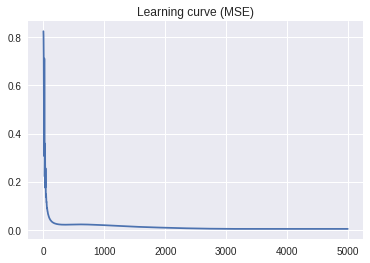

In [0]:
plt.plot(errors_list)
print(MSE)
plt.title("Learning curve (MSE)")
plt.show()

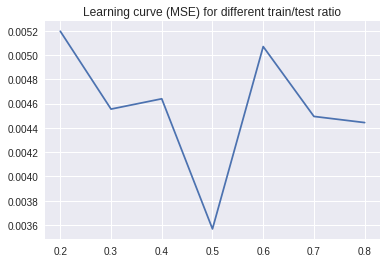

In [0]:
MSE_list=[]
for ratio in [0.2,0.3,0.4,0.5,0.6,0.7,0.8]:
  patterns_train,patterns_test=data_split(patterns,0.2)
  ndata_train,ndata_test=np.shape(patterns_train)[1],np.shape(patterns_test)[1]
  Z_train,Z_test=f(patterns_train[0,:],patterns_train[1,:]),f(patterns_test[0,:],patterns_test[1,:])
  targets_train,targets_test = Z_train.reshape(1,ndata_train).copy(),Z_test.reshape(1,ndata_test).copy()
  W,V,errors_list,misclassifications_list,all_weights1,all_weights2,outputs,MSE=backpropagation_3D(patterns_train,patterns_test,targets_train,targets_test,weights1,weights2,eta,epochs,Nhidden,alpha=0.9,display=False)
  MSE_list.append(MSE)
plt.plot([0.2,0.3,0.4,0.5,0.6,0.7,0.8],MSE_list)
plt.title("Learning curve (MSE) for different train/test ratio")
plt.show()

### Speeding up the convergence

Best model with 19 hidden nodes, eta equals is equal to 0.0007, we can try to increase it. Plus, we can try a ratio of 0.6 or 0.2

In [0]:
Nhidden=19
eta=0.0007
weights1=np.random.randn(Nhidden,np.shape(patterns)[0])
weights2=np.random.randn(1,Nhidden+1)

In [0]:
patterns_train,patterns_test=data_split(patterns,0.2)

In [0]:
ndata_train,ndata_test=np.shape(patterns_train)[1],np.shape(patterns_test)[1]

In [0]:
Z_train,Z_test=f(patterns_train[0,:],patterns_train[1,:]),f(patterns_test[0,:],patterns_test[1,:])

In [0]:
targets_train,targets_test = Z_train.reshape(1,ndata_train).copy(),Z_test.reshape(1,ndata_test).copy()

In [0]:
W,V,errors_list,misclassifications_list,all_weights1,all_weights2,outputs,MSE=backpropagation_3D(patterns_train,patterns_test,targets_train,targets_test,weights1,weights2,eta,epochs,Nhidden,alpha=0.9,display=False)

0.001262262447456455


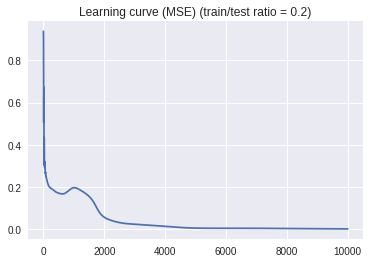

In [0]:
plt.plot(errors_list)
print(MSE)
plt.title("Learning curve (MSE) (train/test ratio = 0.2)")
plt.show()

In [0]:
patterns_train,patterns_test=data_split(patterns,0.6)

In [0]:
ndata_train,ndata_test=np.shape(patterns_train)[1],np.shape(patterns_test)[1]

In [0]:
Z_train,Z_test=f(patterns_train[0,:],patterns_train[1,:]),f(patterns_test[0,:],patterns_test[1,:])

In [0]:
targets_train,targets_test = Z_train.reshape(1,ndata_train).copy(),Z_test.reshape(1,ndata_test).copy()

In [0]:
W,V,errors_list,misclassifications_list,all_weights1,all_weights2,outputs,MSE=backpropagation_3D(patterns_train,patterns_test,targets_train,targets_test,weights1,weights2,eta,epochs,Nhidden,alpha=0.9,display=False)

0.010910131626733226


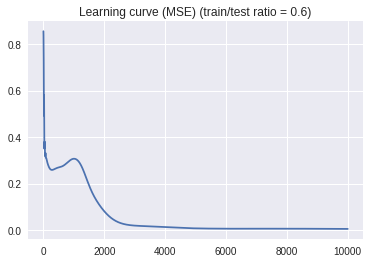

In [0]:
plt.plot(errors_list)
print(MSE)
plt.title("Learning curve (MSE) (train/test ratio = 0.6)")
plt.show()

It seems that the value of convergence is higher with 60% of testing samples. 
If we try to increase eta, the error diverges. It seems that we cannot have a convergence quicker than 5000 epochs.